In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("E:\\ElectricCar.csv")
df.head(5)

Brand                          Model  AccelSec  TopSpeed_KmH  \
0       Tesla   Model 3 Long Range Dual Motor       4.6           233   
1  Volkswagen                       ID.3 Pure      10.0           160   
2    Polestar                               2       4.7           210   
3         BMW                            iX3        6.8           180   
4       Honda                              e        9.5           145   

   Range_Km  Efficiency_WhKm FastCharge_KmH RapidCharge PowerTrain  \
0       450              161            940         Yes        AWD   
1       270              167            250         Yes        RWD   
2       400              181            620         Yes        AWD   
3       360              206            560         Yes        RWD   
4       170              168            190         Yes        RWD   

     PlugType  BodyStyle Segment  Seats  PriceEuro  
0  Type 2 CCS      Sedan       D      5      55480  
1  Type 2 CCS  Hatchback       C      5      30000  
2  Type 2 CCS   Liftback       D      5      56440  
3  Type 2 CCS        SUV       D      5      68040  
4  Type 2 CCS  Hatchback       B      4      32997

In [4]:
df['RapidCharge'].replace(to_replace=['No','Yes'],value=[0,1],inplace= True)
df.head()

Brand                          Model  AccelSec  TopSpeed_KmH  \
0       Tesla   Model 3 Long Range Dual Motor       4.6           233   
1  Volkswagen                       ID.3 Pure      10.0           160   
2    Polestar                               2       4.7           210   
3         BMW                            iX3        6.8           180   
4       Honda                              e        9.5           145   

   Range_Km  Efficiency_WhKm FastCharge_KmH  RapidCharge PowerTrain  \
0       450              161            940            1        AWD   
1       270              167            250            1        RWD   
2       400              181            620            1        AWD   
3       360              206            560            1        RWD   
4       170              168            190            1        RWD   

     PlugType  BodyStyle Segment  Seats  PriceEuro  
0  Type 2 CCS      Sedan       D      5      55480  
1  Type 2 CCS  Hatchback       C      5      30000  
2  Type 2 CCS   Liftback       D      5      56440  
3  Type 2 CCS        SUV       D      5      68040  
4  Type 2 CCS  Hatchback       B      4      32997

In [5]:
df['inr(10e3)'] = df['PriceEuro']*0.08320

In [6]:
df_encoder=df.copy()

In [7]:
df_encoder

Brand                            Model  AccelSec  TopSpeed_KmH  \
0         Tesla     Model 3 Long Range Dual Motor       4.6           233   
1    Volkswagen                         ID.3 Pure      10.0           160   
2      Polestar                                 2       4.7           210   
3           BMW                              iX3        6.8           180   
4         Honda                                e        9.5           145   
..           ...                              ...       ...           ...   
98       Nissan                       Ariya 63kWh       7.5           160   
99         Audi     e-tron S Sportback 55 quattro       4.5           210   
100      Nissan               Ariya e-4ORCE 63kWh       5.9           200   
101      Nissan   Ariya e-4ORCE 87kWh Performance       5.1           200   
102       Byton                 M-Byte 95 kWh 2WD       7.5           190   

     Range_Km  Efficiency_WhKm FastCharge_KmH  RapidCharge PowerTrain  \
0         450              161            940            1        AWD   
1         270              167            250            1        RWD   
2         400              181            620            1        AWD   
3         360              206            560            1        RWD   
4         170              168            190            1        RWD   
..        ...              ...            ...          ...        ...   
98        330              191            440            1        FWD   
99        335              258            540            1        AWD   
100       325              194            440            1        AWD   
101       375              232            450            1        AWD   
102       400              238            480            1        AWD   

       PlugType  BodyStyle Segment  Seats  PriceEuro  inr(10e3)  
0    Type 2 CCS      Sedan       D      5      55480  4615.9360  
1    Type 2 CCS  Hatchback       C      5      30000  2496.0000  
2    Type 2 CCS   Liftback       D      5      56440  4695.8080  
3    Type 2 CCS        SUV       D      5      68040  5660.9280  
4    Type 2 CCS  Hatchback       B      4      32997  2745.3504  
..          ...        ...     ...    ...        ...        ...  
98   Type 2 CCS  Hatchback       C      5      45000  3744.0000  
99   Type 2 CCS        SUV       E      5      96050  7991.3600  
100  Type 2 CCS  Hatchback       C      5      50000  4160.0000  
101  Type 2 CCS  Hatchback       C      5      65000  5408.0000  
102  Type 2 CCS        SUV       E      5      62000  5158.4000  

[103 rows x 15 columns]

In [8]:
model_counts = df['RapidCharge'].value_counts()

model_counts_df = model_counts.reset_index()
model_counts_df.columns = ['RapidCharge', 'Count']

model_counts_df


RapidCharge  Count
0            1     98
1            0      5

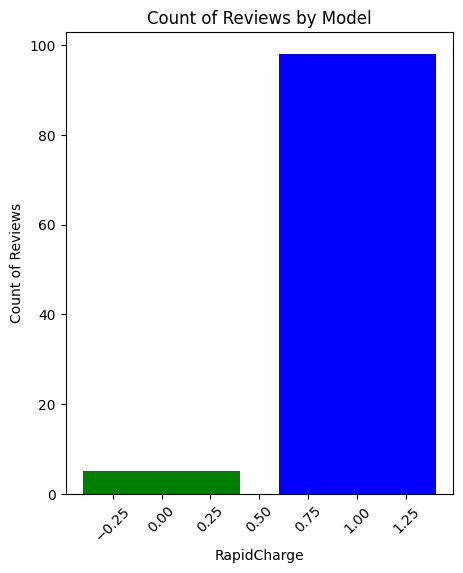

In [9]:
import matplotlib.pyplot as plt

# Plotting the model counts
plt.figure(figsize=(5, 6))
plt.bar(model_counts_df['RapidCharge'], model_counts_df['Count'], color=['blue', 'green', 'red'])
plt.title('Count of Reviews by Model')
plt.xlabel('RapidCharge')
plt.ylabel('Count of Reviews')
plt.xticks(rotation=45)
plt.show()

In [10]:
import plotly.express as px

f= px.bar(df,x='Brand',y = 'TopSpeed_KmH',color = 'Brand',title = 'Which Car Has a Top speed?',labels = {'x':'Car Brands','y':'Top Speed Km/H'})
f

Text(0, 0.5, 'Frequency')

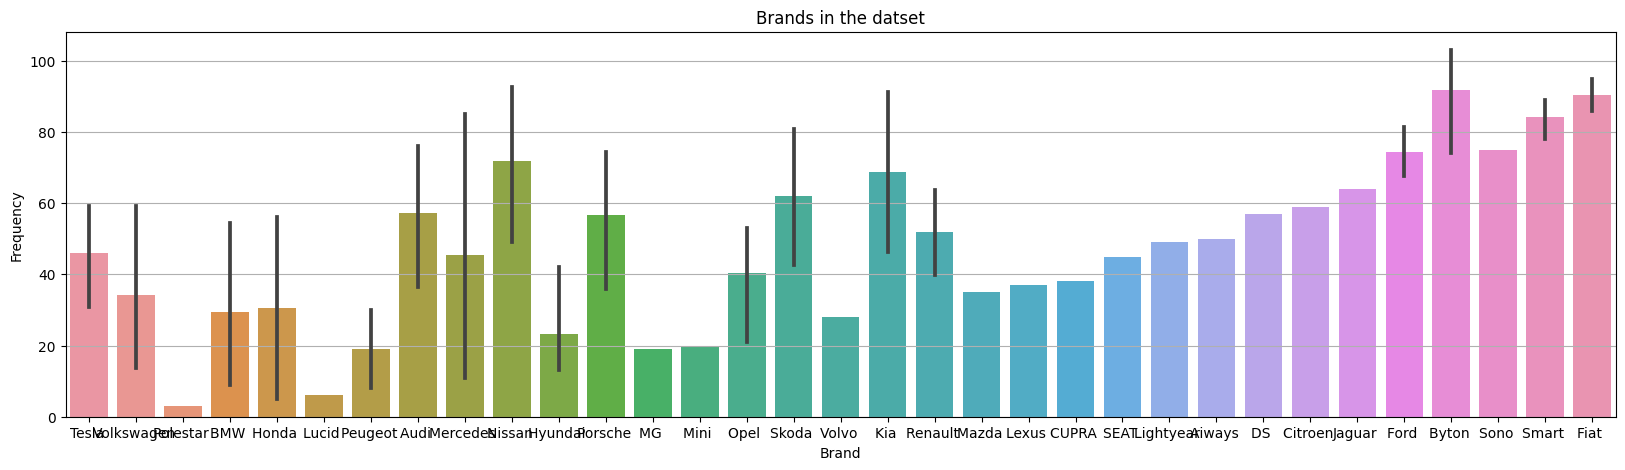

In [12]:
import seaborn as sns
import numpy as np
a=np.arange(1,104)
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y=a,data=df)
plt.grid(axis='y')
plt.title('Brands in the datset')
plt.xlabel('Brand')
plt.ylabel('Frequency')
#plt.xticks(rotation=45)

Text(0, 0.5, 'Range')

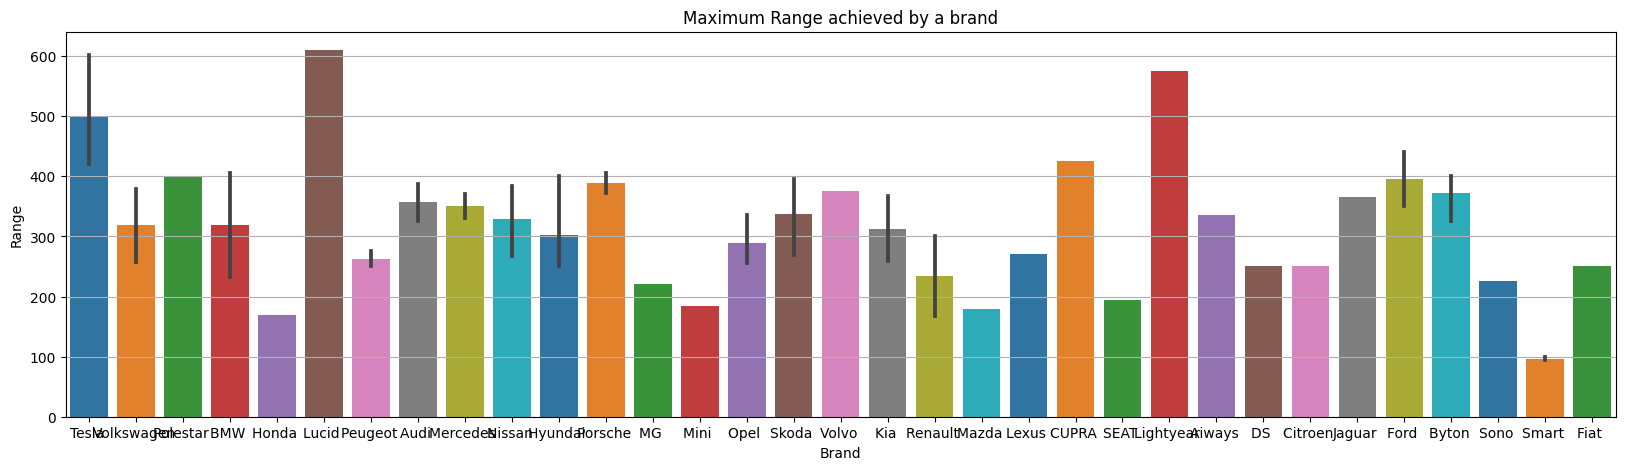

In [13]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='Range_Km',data=df,palette='tab10')
plt.grid(axis='y')
plt.title('Maximum Range achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Range')

Text(0.5, 1.0, 'Plug Type')

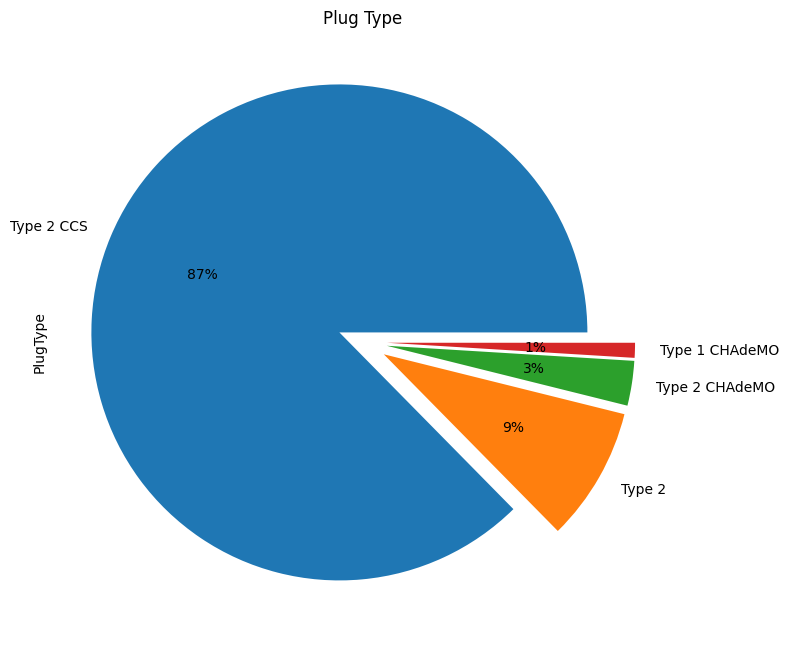

In [14]:
df['PlugType'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(.1,.1,.1,.1))
plt.title('Plug Type')

Text(0.5, 1.0, 'Segment')

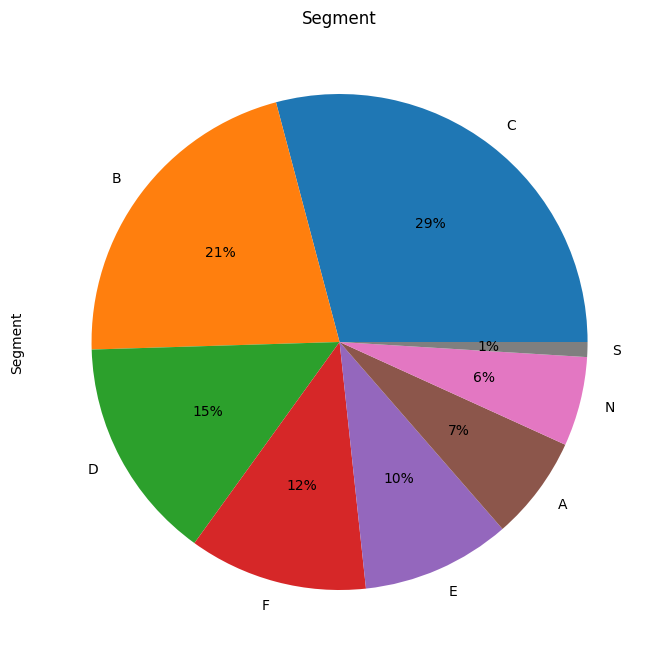

In [15]:
df['Segment'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%')
plt.title('Segment')


Text(0.5, 1.0, 'Body Style')

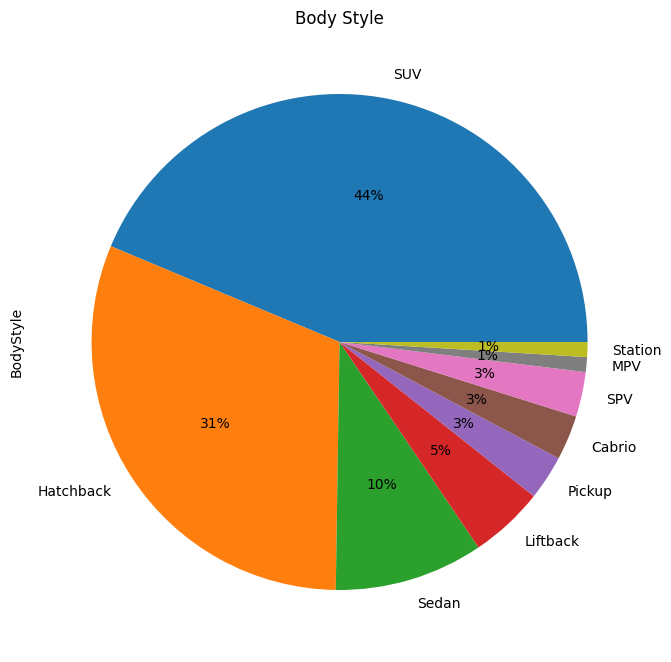

In [16]:
df['BodyStyle'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%')
plt.title('Body Style')


Text(0.5, 1.0, 'Seats')

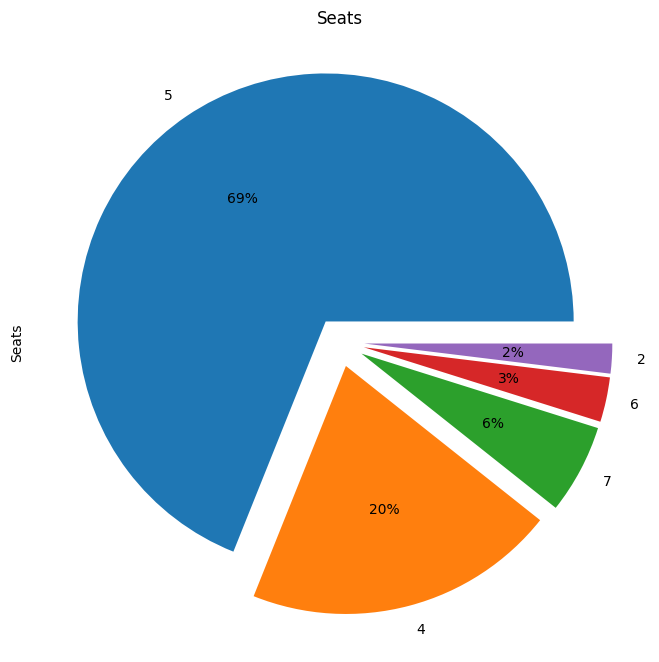

In [17]:
df['Seats'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1))
plt.title('Seats')


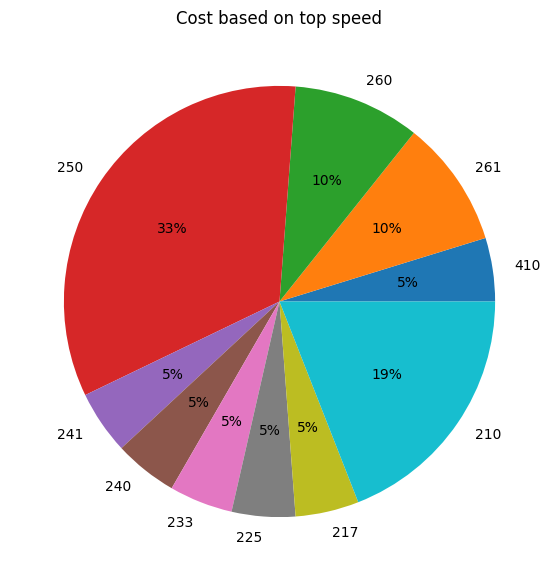

In [18]:
df3= df[["TopSpeed_KmH", "inr(10e3)"]].groupby("TopSpeed_KmH").count()
df3=df3.sort_values("TopSpeed_KmH",ascending = False).head(10)
plt.figure(figsize=(10,7))
plt.title('Cost based on top speed')
plt.pie(x=df3["inr(10e3)"],labels=df3.index,autopct='%1.0f%%')
plt.show()


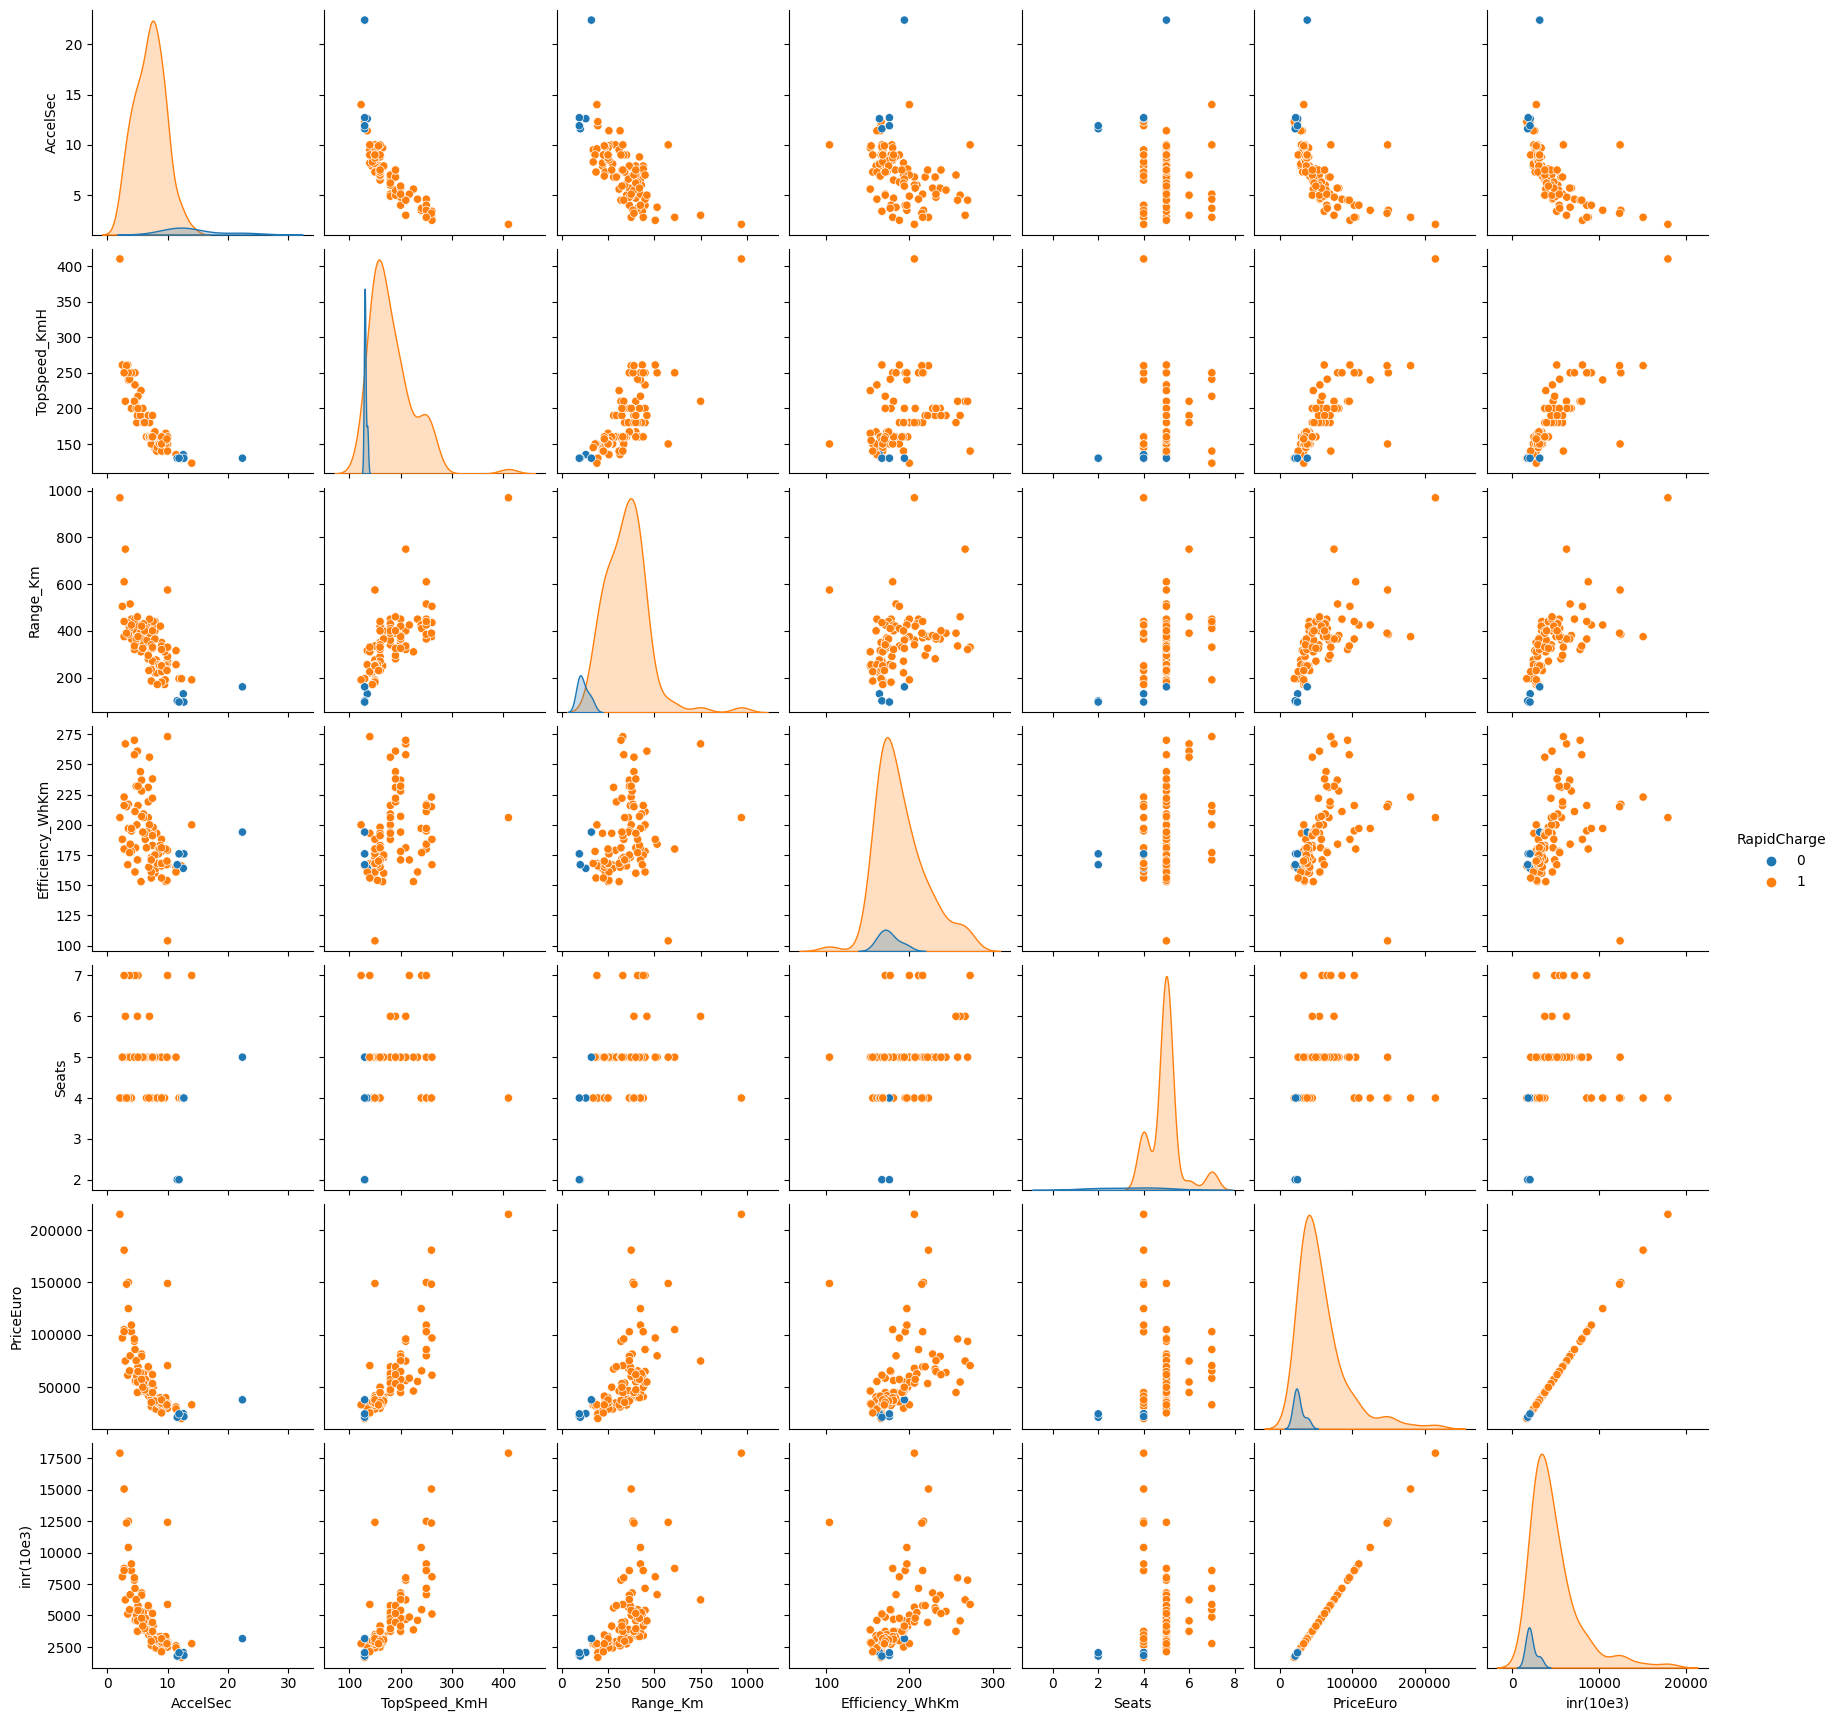

In [19]:
import seaborn as sns
sns.pairplot(df,hue='RapidCharge')

In [20]:
df.head()

Brand                          Model  AccelSec  TopSpeed_KmH  \
0       Tesla   Model 3 Long Range Dual Motor       4.6           233   
1  Volkswagen                       ID.3 Pure      10.0           160   
2    Polestar                               2       4.7           210   
3         BMW                            iX3        6.8           180   
4       Honda                              e        9.5           145   

   Range_Km  Efficiency_WhKm FastCharge_KmH  RapidCharge PowerTrain  \
0       450              161            940            1        AWD   
1       270              167            250            1        RWD   
2       400              181            620            1        AWD   
3       360              206            560            1        RWD   
4       170              168            190            1        RWD   

     PlugType  BodyStyle Segment  Seats  PriceEuro  inr(10e3)  
0  Type 2 CCS      Sedan       D      5      55480  4615.9360  
1  Type 2 CCS  Hatchback       C      5      30000  2496.0000  
2  Type 2 CCS   Liftback       D      5      56440  4695.8080  
3  Type 2 CCS        SUV       D      5      68040  5660.9280  
4  Type 2 CCS  Hatchback       B      4      32997  2745.3504

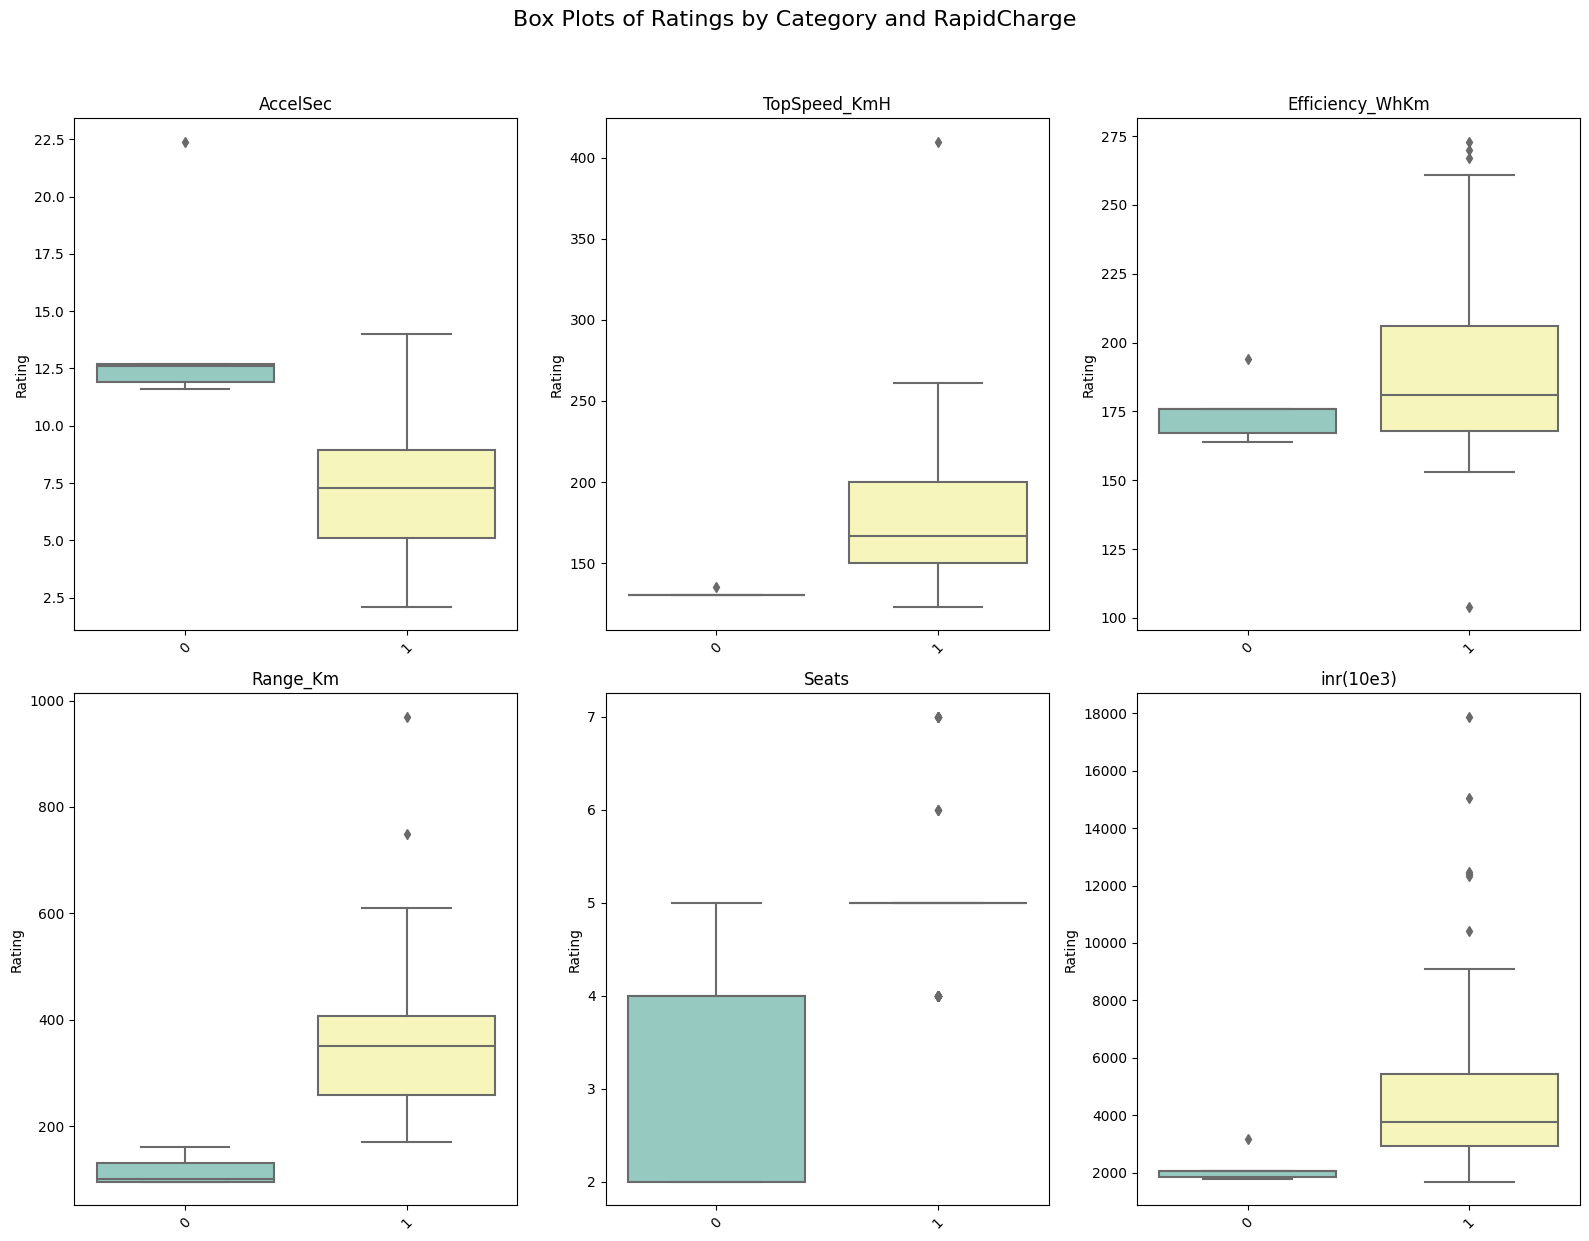

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 3, figsize=(16, 12))  # Create a figure and a grid of subplots
axs = axs.flatten()  # Flatten the array of axes for easy iteration
categories = ['AccelSec','TopSpeed_KmH','Efficiency_WhKm' ,'Range_Km', 'Seats', 'inr(10e3)']
for i, category in enumerate(categories):
    # Plot boxplot
    sns.boxplot(x='RapidCharge', y=category, data=df, ax=axs[i], showfliers=True, palette="Set3")
    
    axs[i].set_title(category)
    axs[i].set_xlabel('')
    axs[i].set_ylabel('Rating')
    axs[i].tick_params(axis='x', rotation=45)

# Adjust layout
plt.suptitle('Box Plots of Ratings by Category and RapidCharge', fontsize=16, y=1.03)
plt.tight_layout()
plt.show()


In [22]:
from sklearn.preprocessing import StandardScaler,PowerTransformer
features = ['AccelSec','TopSpeed_KmH','Efficiency_WhKm' , 'RapidCharge','Range_Km', 'Seats', 'inr(10e3)']
# Separating out the features
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x)


In [23]:
from sklearn.decomposition import PCA

x=df.drop(columns=['FastCharge_KmH','PowerTrain','inr(10e3)','Segment','PlugType','BodyStyle','Model','Brand'])
# performing pca for dimension reduction
x.head()

AccelSec  TopSpeed_KmH  Range_Km  Efficiency_WhKm  RapidCharge  Seats  \
0       4.6           233       450              161            1      5   
1      10.0           160       270              167            1      5   
2       4.7           210       400              181            1      5   
3       6.8           180       360              206            1      5   
4       9.5           145       170              168            1      4   

   PriceEuro  
0      55480  
1      30000  
2      56440  
3      68040  
4      32997

In [24]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA  # Import PCA class from scikit-learn

pca = PCA()
x_pca = pca.fit_transform(x)

std_dev = np.sqrt(pca.explained_variance_)  #find std_dev
proportion_variance = pca.explained_variance_ratio_  # find proportion_variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_) # find cumulative_variance

pca_summary_df = pd.DataFrame({
    'Standard Deviation': std_dev,
    'Proportion of Variance': proportion_variance,
    'Cumulative Proportion': cumulative_variance
})
new_column_names = ['PC' + str(i) for i in range(1, 8)]
transposed_df = pca_summary_df.T
transposed_df.columns = new_column_names
transposed_df


PC1        PC2           PC3           PC4  \
Standard Deviation      34134.792394  93.711151  2.708885e+01  2.156318e+01   
Proportion of Variance      0.999991   0.000008  6.297715e-07  3.990500e-07   
Cumulative Proportion       0.999991   0.999999  9.999996e-01  1.000000e+00   

                                 PC5           PC6           PC7  
Standard Deviation      1.775952e+00  6.986025e-01  1.535469e-01  
Proportion of Variance  2.706849e-09  4.188533e-10  2.023410e-11  
Cumulative Proportion   1.000000e+00  1.000000e+00  1.000000e+00

In [25]:
std_dev = np.round(np.sqrt(pca.explained_variance_), 1)
print("Standard Deviation:\n",std_dev)

Standard Deviation:
 [3.41348e+04 9.37000e+01 2.71000e+01 2.16000e+01 1.80000e+00 7.00000e-01
 2.00000e-01]


In [26]:
rotation_matrix = np.round(pca.components_, 3)*-1

df_pca=pd.DataFrame(rotation_matrix.T) 
df_pca.columns=new_column_names
new_row_names = [
    'AccelSec','TopSpeed_KmH','Range_Km','Efficiency_WhKm','RapidCharge','Seats','PriceEuro'
]
df_pca.index=new_row_names
df_pca

PC1    PC2    PC3    PC4    PC5    PC6    PC7
AccelSec         0.000  0.011 -0.015 -0.048 -0.997 -0.004  0.057
TopSpeed_KmH    -0.001 -0.125  0.047  0.990 -0.050 -0.001  0.003
Range_Km        -0.002 -0.992 -0.028 -0.124 -0.005 -0.003 -0.000
Efficiency_WhKm -0.000 -0.021  0.998 -0.051 -0.013 -0.009  0.002
RapidCharge     -0.000 -0.001  0.000 -0.000  0.056  0.107  0.993
Seats           -0.000 -0.003  0.009 -0.000 -0.010  0.994 -0.106
PriceEuro       -1.000  0.003 -0.000 -0.001  0.000  0.000 -0.000

In [27]:
pca_scores = pca.transform(x)

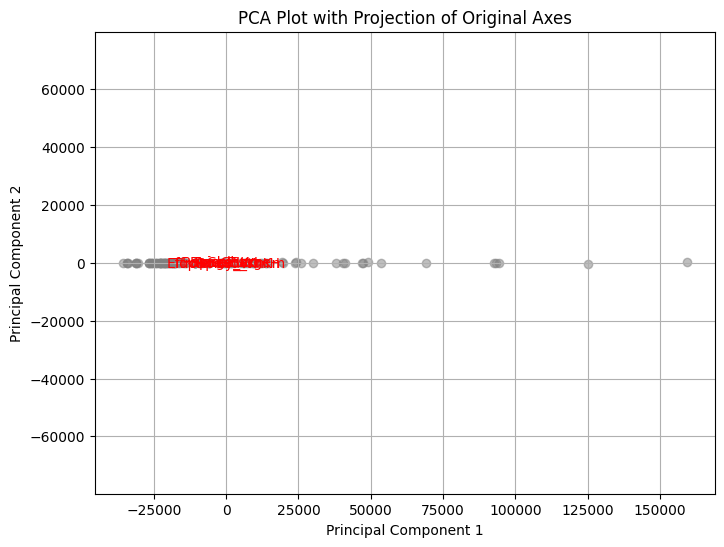

In [28]:
column_names = ['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'RapidCharge', 'Seats',
                'PriceEuro', 'FastCharge_KmH', 'PowerTrain', 'inr(10e3)', 'BodyStyle', 'Model', 'Brand']

# Plotting the PCA scores
plt.figure(figsize=(8, 6))
plt.scatter(pca_scores[:, 0], pca_scores[:, 1], color='grey', alpha=0.5)

# Adding the projection of the original axes (loadings)
for i, component in enumerate(rotation_matrix.T):
    plt.arrow(0, 0, component[0], component[1], color='red', width=0.01, head_width=0.03)
    plt.text(component[0] * 1.05, component[1] * 1.05, column_names[i], color='red', ha='center', va='center')

# Setting up the plot
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot with Projection of Original Axes')
plt.grid(True)
plt.axis('equal')  # Ensuring the scale is the same on both axes
plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_2956\4045412282.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



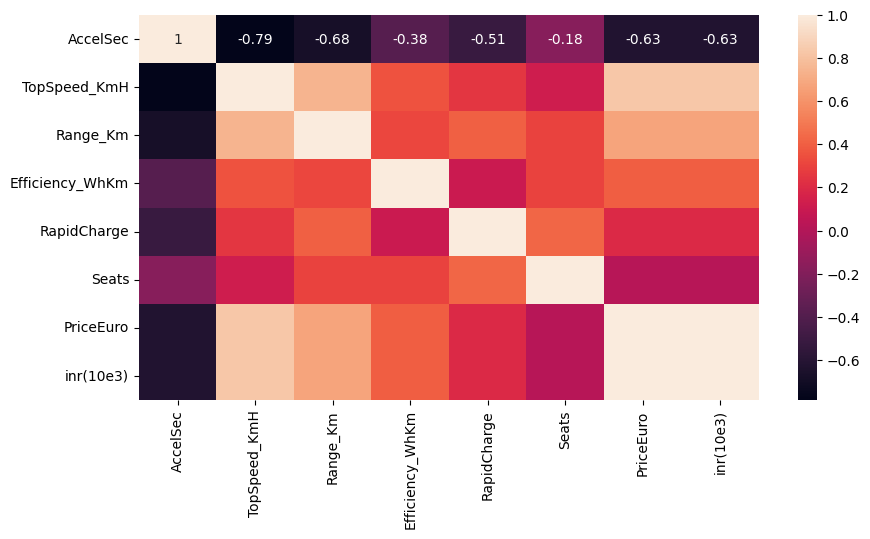

In [87]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)
plt.show()


In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Simulated data with 11 features
np.random.seed(1234)
data = x  


Extracting Segments

K-Means

In [30]:
# Function to perform k-means with multiple random restarts
def kmeans_clustering(data, n_clusters, n_init):
    kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=1234)
    kmeans.fit(data)
    return kmeans.labels_, kmeans

K-Means Clustering Function

In [31]:
# Function to perform k-means clustering for stability assessment
def perform_kmeans(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters)
    return kmeans.fit_predict(data)


Clustering Analysis and Stability Assessment

In [32]:
# Store results for comparison, KMeans models, and stability scores
results = {}
kmeans_models = []
inertias = []
stability_scores = {k: [] for k in range(2, 7)}
num_replications = 10  # Number of replications for stability assessment

for n_clusters in range(2, 7):
    labels, kmeans_model = kmeans_clustering(data, n_clusters, 10)
    kmeans_models.append(kmeans_model)
    inertias.append(kmeans_model.inertia_)

    # Stability assessment
    labels_list = [perform_kmeans(data, n_clusters) for _ in range(num_replications)]
    for i in range(num_replications):
        for j in range(i + 1, num_replications):
            score = adjusted_rand_score(labels_list[i], labels_list[j])
            stability_scores[n_clusters].append(score)

    # Analyzing the clusters
    unique, counts = np.unique(labels, return_counts=True)
    cluster_distribution = dict(zip(unique, counts))


    results[n_clusters] = {
        "Cluster Distribution": cluster_distribution,
    }

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\adm

Results for 2 Segments:
  Cluster Distribution: {0: 90, 1: 13}
Results for 3 Segments:
  Cluster Distribution: {0: 29, 1: 68, 2: 6}
Results for 4 Segments:
  Cluster Distribution: {0: 58, 1: 10, 2: 5, 3: 30}
Results for 5 Segments:
  Cluster Distribution: {0: 8, 1: 61, 2: 2, 3: 28, 4: 4}
Results for 6 Segments:
  Cluster Distribution: {0: 18, 1: 49, 2: 4, 3: 23, 4: 1, 5: 8}


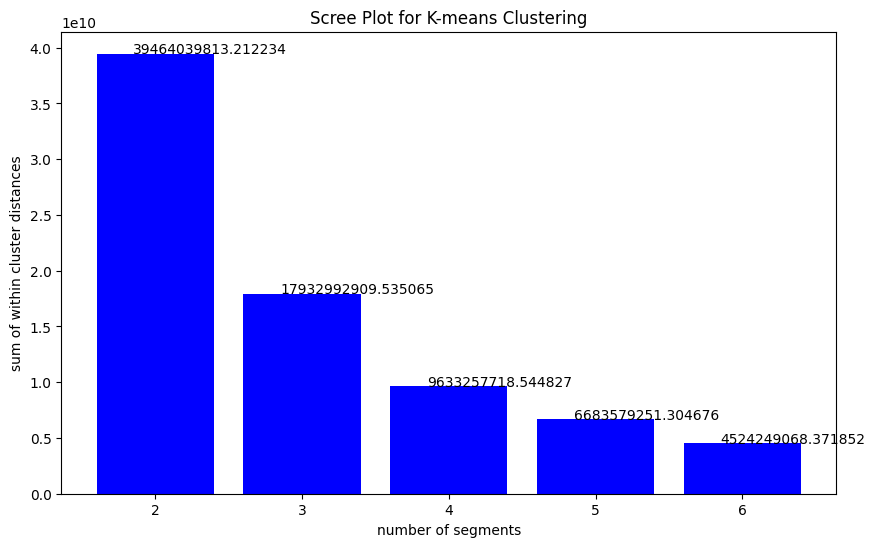

In [33]:
# Displaying the results
for n_clusters, result in results.items():
    print(f"Results for {n_clusters} Segments:")
    print(f"  Cluster Distribution: {result['Cluster Distribution']}")

# Creating a scree plot
plt.figure(figsize=(10, 6))
bars = plt.bar(range(2, 7), inertias, color='blue')
plt.xlabel('number of segments')
plt.ylabel('sum of within cluster distances')
plt.title('Scree Plot for K-means Clustering')
plt.xticks(range(2, 7))

for bar, inertia in zip(bars, inertias):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 1, str(inertia), fontsize=10, color='black')

plt.show()


In [34]:
# Calculating average stability score for each number of clusters
average_stability = {k: np.mean(v) for k, v in stability_scores.items()}

# Identifying the number of clusters with the highest stability score
optimal_clusters = max(average_stability, key=average_stability.get)

# Output results for stability scores
print("Average Stability Scores for Different Number of Clusters:")
for k, v in average_stability.items():
    print(f"  Clusters: {k}, Average Stability Score: {v:.3f}")

print(f"\nOptimal number of clusters based on stability: {optimal_clusters}")


Average Stability Scores for Different Number of Clusters:
  Clusters: 2, Average Stability Score: 1.000
  Clusters: 3, Average Stability Score: 1.000
  Clusters: 4, Average Stability Score: 0.983
  Clusters: 5, Average Stability Score: 0.930
  Clusters: 6, Average Stability Score: 0.951

Optimal number of clusters based on stability: 2


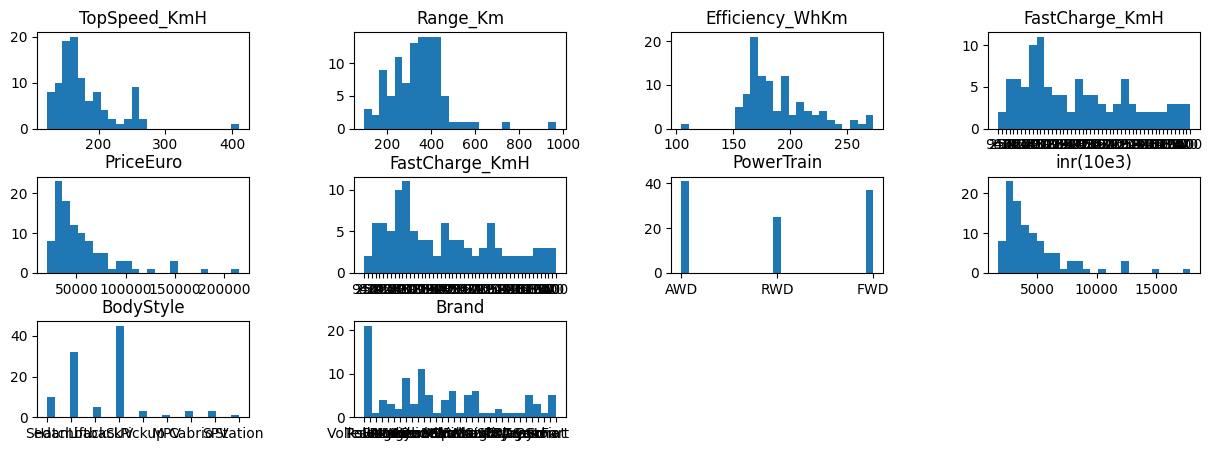

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(1, figsize=(15, 5))
n = 0

for x in ['TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'FastCharge_KmH',
          'PriceEuro', 'FastCharge_KmH', 'PowerTrain', 'inr(10e3)', 'BodyStyle', 'Brand']:
    n += 1
    plt.subplot(3, 4, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.hist(df[x], bins=25)
    plt.title(f'{x}')

plt.show()


In [36]:
from scipy.cluster.hierarchy import dendrogram, linkage
pca = PCA(n_components=6)
t=pca.fit_transform(data)
data2 = pd.DataFrame(t, columns=['PC1', 'PC2','PC3','PC4','PC5','PC6'])
data2

PC1         PC2        PC3        PC4       PC5       PC6
0     -331.237384  117.314291  28.511378 -41.291316  0.086363  0.020262
1   -25811.666429   -3.729974  12.784387  -9.213417  1.378757 -0.255244
2      628.617001   62.772871   8.557292 -23.001170 -0.965927  0.007359
3    12228.450876  -10.419365 -12.296860  11.512079 -0.407985 -0.042219
4   -22814.942226 -112.590660  10.701713  -4.552909 -0.403728  0.384202
..            ...         ...        ...        ...       ...       ...
98  -10811.564423   17.160289  -4.682949  10.179191 -0.720547 -0.029763
99   40238.334031 -103.473973 -57.250769   1.537293 -1.068255  0.036873
100  -5811.552048    4.213680  -8.098077 -26.336794 -0.385104 -0.051450
101   9188.529761   15.465024 -39.793409  -7.389740 -0.661613  0.270338
102   6188.594561   46.950046 -45.560398   3.852066  1.477321  0.436942

[103 rows x 6 columns]

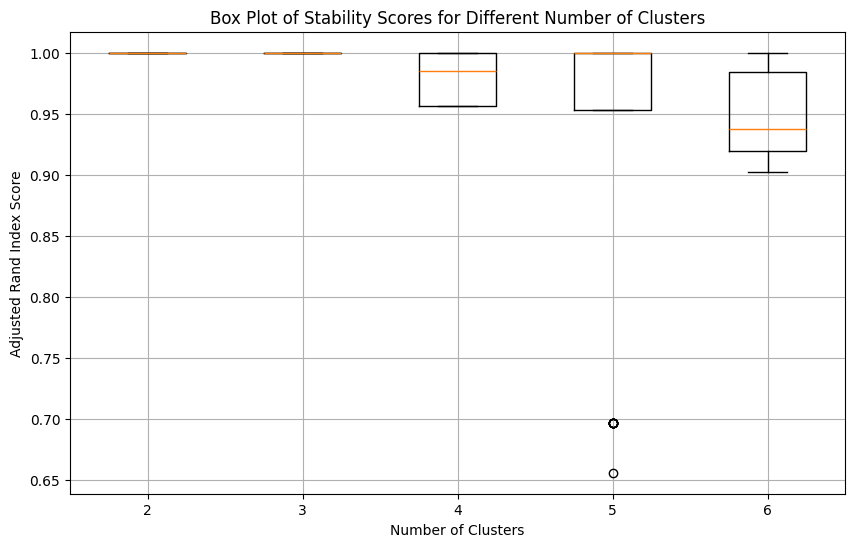

In [37]:
# Plotting the box plot of stability scores
plt.figure(figsize=(10, 6))
plt.boxplot([stability_scores[k] for k in range(2, 7)], labels=[str(k) for k in range(2, 7)])
plt.title('Box Plot of Stability Scores for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Adjusted Rand Index Score')
plt.grid(True)
plt.show()

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



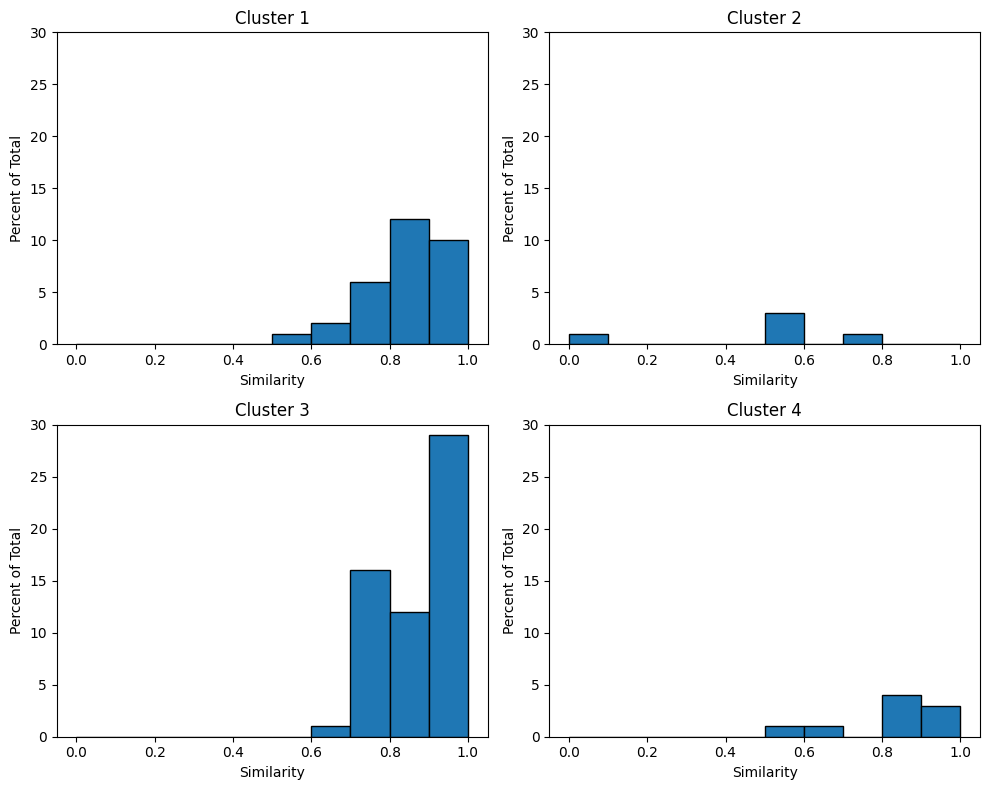

In [38]:
np.random.seed(1234)

# Perform k-means clustering for 4 segments
kmeans = KMeans(n_clusters=4, n_init=10, random_state=0)
kmeans.fit(data)

# Assign each data point to the nearest cluster and calculate the distance from the centroid
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# We will calculate the euclidean distance from each point to its cluster centroid
distances = np.sqrt(((data - centroids[labels]) ** 2).sum(axis=1))

# Normalize distances to a similarity score between 0 and 1 for the sake of the example
similarities = 1 - (distances / np.max(distances))

# Create subplots for each cluster
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

for i in range(4):
    cluster_similarities = similarities[labels == i]
    axes[i].hist(cluster_similarities, bins=10, range=(0,1), edgecolor='black')
    axes[i].set_title(f'Cluster {i+1}')
    axes[i].set_xlabel('Similarity')
    axes[i].set_ylabel('Percent of Total')
    axes[i].set_ylim(0, 30)  # Assuming percent of total is based on the y-axis limit
    
# Adjust the layout
plt.tight_layout()
plt.show()


C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\adm

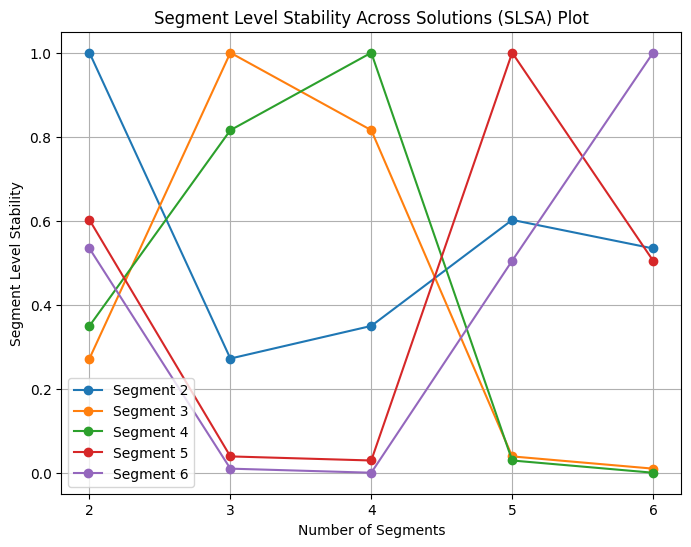

In [39]:
# Perform clustering 
segment_stability_final = []

for segment in range(2, 7):
    kmeans = KMeans(n_clusters=segment, random_state=42)
    labels = kmeans.fit_predict(data)
    segment_stability_final.append(labels)

# Plotting SLSA with cleaned and verified data
plt.figure(figsize=(8, 6))

for i, segment in enumerate(range(2, 7)):
    plt.plot(range(2, 7), [np.mean(segment_stability_final[i] == labels) for labels in segment_stability_final], marker='o', label=f'Segment {segment}')

plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.xticks(list(range(2, 7)))
plt.legend()
plt.grid(True)

plt.show()


C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\adm

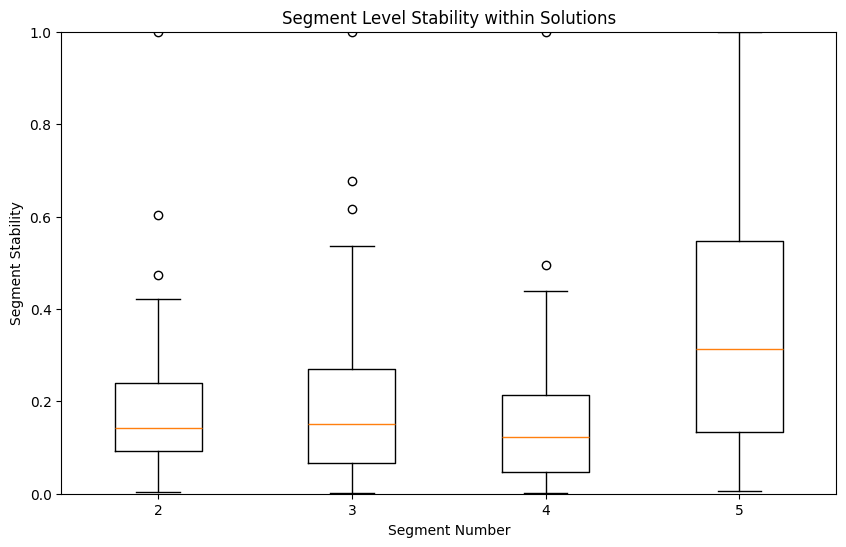

In [40]:
segment_solutions = ["2", "3", "4", "5"]

# Generate a KMeans model for each segment solution
MD_km28 = {}
for segment in segment_solutions:
    MD_km28[segment] = KMeans(n_clusters=int(segment), random_state=0).fit(data)

# Predict labels and calculate similarities (distances) for each segment solution
segment_labels = {}
segment_similarities = {}

for segment in segment_solutions:
    segment_labels[segment] = MD_km28[segment].predict(data)
    segment_similarities[segment] = MD_km28[segment].transform(data).min(axis=1)

# Normalizing the similarities and preparing the stability values for the plot
segment_stability_values = []
for segment in segment_solutions:
    similarities = segment_similarities[segment]
    normalized_similarities = similarities / np.max(similarities) 
    segment_stability_values.append(normalized_similarities)

# Plotting the boxplot for each segment solution's stability
plt.figure(figsize=(10, 6))
plt.boxplot(segment_stability_values, whis=1.5)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.xticks(range(1, len(segment_solutions) + 1), segment_solutions)
plt.ylim(0, 1)
plt.title("Segment Level Stability within Solutions")
plt.show()


In [42]:
from sklearn.mixture import GaussianMixture
x=df.drop(columns=['FastCharge_KmH','PowerTrain','inr(10e3)','Segment','PlugType','BodyStyle','Model','Brand'])
# performing pca for dimension reduction
x.head()

# Function to calculate entropy of classification
def classification_entropy(model, x):
    probs = model.predict_proba(x)
    entropy = -np.sum(probs * np.log(probs + 1e-10))  # Adding a small value to avoid log(0)
    return entropy 

# List to store results
results = []

# Fit models and collect results
for k in range(2, 7):  # Equivalent to 2:8 in R
    model = GaussianMixture(n_components=k, random_state=1234).fit(x)
    
    entropy = classification_entropy(model, x)
    bic = model.bic(x)
    icl = bic - entropy
    
    # Collecting results
    results.append({
        "iter": model.n_iter_,
        "converged": model.converged_,
        "k": k,
        "logLik": model.score(x) * len(x),  # Total log-likelihood
        "AIC": model.aic(x),
        "BIC": bic,
        "ICL": icl
    })

# Convert to DataFrame for display
results_df = pd.DataFrame(results)

# Display the DataFrame
print(results_df)


C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

   iter  converged  k       logLik          AIC          BIC          ICL
0    10       True  2 -2398.954153  4939.908307  5126.974065  5126.974061
1     9       True  3 -2177.799006  4569.598012  4851.514013  4851.514013
2     9       True  4 -2098.498056  4482.996111  4859.762356  4859.746152
3     9       True  5 -1976.284846  4310.569693  4782.186181  4782.177062
4     9       True  6 -1907.097450  4244.194900  4810.661633  4810.652513


C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



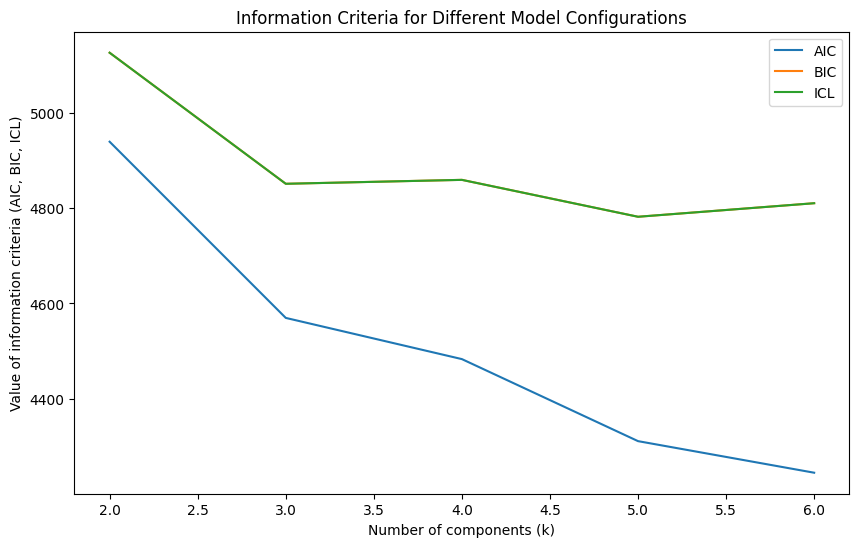

In [43]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(results_df["k"], results_df["AIC"], label='AIC')
plt.plot(results_df["k"], results_df["BIC"], label='BIC')
plt.plot(results_df["k"], results_df["ICL"], label='ICL')
plt.xlabel('Number of components (k)')
plt.ylabel('Value of information criteria (AIC, BIC, ICL)')
plt.title('Information Criteria for Different Model Configurations')
plt.legend()
plt.show()

In [44]:
# Importing necessary libraries

from patsy import dmatrices
from sklearn.mixture import GaussianMixture
import statsmodels.api as sm


In [45]:
data=df.drop(columns=['Model'])
data


Brand  AccelSec  TopSpeed_KmH  Range_Km  Efficiency_WhKm  \
0         Tesla        4.6           233       450              161   
1    Volkswagen       10.0           160       270              167   
2      Polestar        4.7           210       400              181   
3           BMW        6.8           180       360              206   
4         Honda        9.5           145       170              168   
..           ...       ...           ...       ...              ...   
98       Nissan        7.5           160       330              191   
99         Audi        4.5           210       335              258   
100      Nissan        5.9           200       325              194   
101      Nissan        5.1           200       375              232   
102       Byton        7.5           190       400              238   

    FastCharge_KmH  RapidCharge PowerTrain    PlugType  BodyStyle Segment  \
0              940            1        AWD  Type 2 CCS      Sedan       D   
1              250            1        RWD  Type 2 CCS  Hatchback       C   
2              620            1        AWD  Type 2 CCS   Liftback       D   
3              560            1        RWD  Type 2 CCS        SUV       D   
4              190            1        RWD  Type 2 CCS  Hatchback       B   
..             ...          ...        ...         ...        ...     ...   
98             440            1        FWD  Type 2 CCS  Hatchback       C   
99             540            1        AWD  Type 2 CCS        SUV       E   
100            440            1        AWD  Type 2 CCS  Hatchback       C   
101            450            1        AWD  Type 2 CCS  Hatchback       C   
102            480            1        AWD  Type 2 CCS        SUV       E   

     Seats  PriceEuro  inr(10e3)  
0        5      55480  4615.9360  
1        5      30000  2496.0000  
2        5      56440  4695.8080  
3        5      68040  5660.9280  
4        4      32997  2745.3504  
..     ...        ...        ...  
98       5      45000  3744.0000  
99       5      96050  7991.3600  
100      5      50000  4160.0000  
101      5      65000  5408.0000  
102      5      62000  5158.4000  

[103 rows x 14 columns]

In [46]:
#creating formula 
columns = '+'.join(data.columns[0:5]) 
formula = f'RapidCharge ~ {columns}'
formula


'RapidCharge ~ Brand+AccelSec+TopSpeed_KmH+Range_Km+Efficiency_WhKm'

In [47]:
y, X = dmatrices(formula, data, return_type='dataframe')


In [48]:
gmm = GaussianMixture(n_components=2, n_init=10, random_state=1234, verbose=0)
gmm.fit(X)


C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

GaussianMixture(n_components=2, n_init=10, random_state=1234)

In [49]:
# Extracting and displaying information
labels = gmm.predict(X)
cluster_sizes = pd.Series(labels).value_counts().sort_index()
converged = gmm.converged_
n_iterations = gmm.n_iter_

print("Cluster Sizes:")
for i, size in enumerate(cluster_sizes):
    print(f"Component {i + 1}: {size} data points")
print(f"Convergence after {n_iterations} iterations: {converged}")


Cluster Sizes:
Component 1: 29 data points
Component 2: 74 data points
Convergence after 6 iterations: True


In [50]:
# Preparing data for each component
data_comp1 = data[labels == 0]
data_comp2 = data[labels == 1]

# Extract y and X for each component using the formula
y_comp1, X_comp1 = dmatrices(formula, data=data_comp1, return_type='dataframe')
y_comp2, X_comp2 = dmatrices(formula, data=data_comp2, return_type='dataframe')

# Now you can fit separate regression models for each component
model_comp1 = sm.OLS(y_comp1, sm.add_constant(X_comp1)).fit()
model_comp2 = sm.OLS(y_comp2, sm.add_constant(X_comp2)).fit()

In [51]:
print(model_comp1.summary())

                            OLS Regression Results                            
Dep. Variable:            RapidCharge   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     5.157
Date:                Sun, 18 Feb 2024   Prob (F-statistic):            0.00795
Time:                        12:21:49   Log-Likelihood:                 22.977
No. Observations:                  29   AIC:                            -5.954
Df Residuals:                       9   BIC:                             21.39
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.6920      3.53

In [52]:
print(model_comp2.summary())


                            OLS Regression Results                            
Dep. Variable:            RapidCharge   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -2.476
Date:                Sun, 18 Feb 2024   Prob (F-statistic):               1.00
Time:                        12:21:49   Log-Likelihood:                 2312.4
No. Observations:                  74   AIC:                            -4581.
Df Residuals:                      52   BIC:                            -4530.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.0000 

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning:

divide by zero encountered in double_scalars



In [53]:
def create_summary(model):
    summary_df = pd.DataFrame({'Coef.': model.params, 'P>|t|': model.pvalues})
    conf_int = model.conf_int()
    summary_df['lower_ci'] = conf_int[0]
    summary_df['upper_ci'] = conf_int[1]
    return summary_df

# Create summaries
summary_comp1 = create_summary(model_comp1)
summary_comp2 = create_summary(model_comp2)

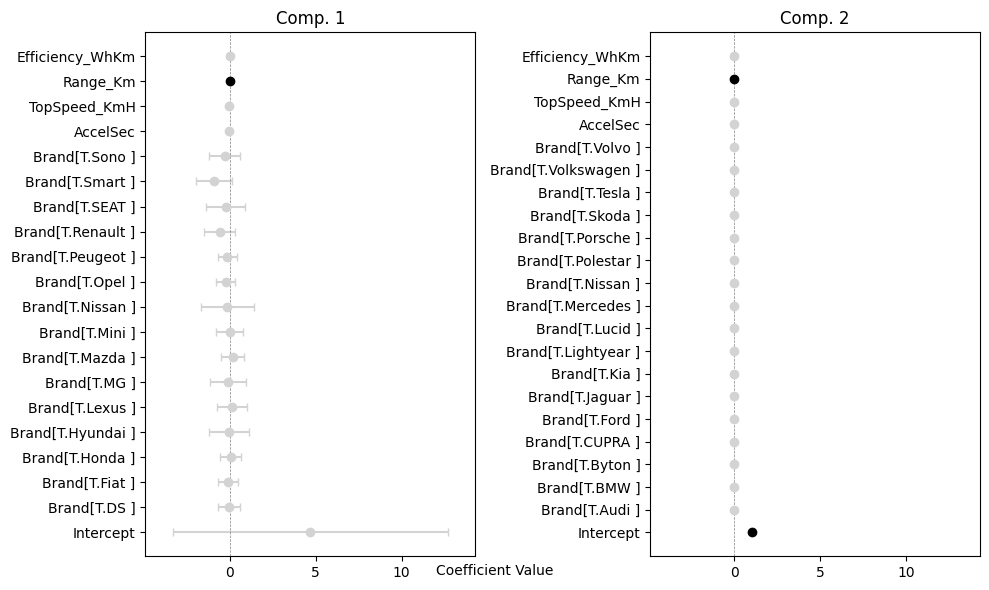

In [54]:
 #Define the plotting function
def plot_coefficients(summary, ax, title, alpha=0.05, color_significant='black', color_insignificant='lightgrey'):
    y_labels = summary.index
    y_ticks = np.arange(len(y_labels))
    for i, (index, row) in enumerate(summary.iterrows()):
        coef, lower_ci, upper_ci, p_value = row['Coef.'], row['lower_ci'], row['upper_ci'], row['P>|t|']
        color = color_significant if p_value < alpha else color_insignificant
        # Calculate the errors from the coefficient to the confidence interval bounds
        err = [[coef - lower_ci], [upper_ci - coef]]
        ax.errorbar(coef, y_ticks[i], xerr=err, fmt='o', color=color, ecolor=color, capsize=3)
    
    ax.set_yticks(y_ticks)
    ax.set_yticklabels(y_labels)
    ax.axvline(x=0, color='grey', linestyle='--', lw=0.5)
    ax.set_title(title)

# Plotting setup
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# Adjust the x-axis scale based on the confidence intervals
all_intervals = np.concatenate([summary_comp1['lower_ci'], summary_comp1['upper_ci'], 
                                summary_comp2['lower_ci'], summary_comp2['upper_ci']])
x_min, x_max = all_intervals.min(), all_intervals.max()
x_margin = (x_max - x_min) * 0.1  # 10% margin
x_min, x_max = x_min - x_margin, x_max + x_margin

# Plot the coefficients for each component
plot_coefficients(summary_comp1, axs[0], 'Comp. 1')
plot_coefficients(summary_comp2, axs[1], 'Comp. 2')

# Set the same x-axis limits for both subplots
axs[0].set_xlim(x_min, x_max)
axs[1].set_xlim(x_min, x_max)

# Add a shared x-axis label
fig.text(0.5, 0.04, 'Coefficient Value', ha='center', va='center')

# Layout adjustment
plt.tight_layout()

# Display the plot
plt.show()


In [55]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import LabelEncoder


In [56]:
data.head()

Brand  AccelSec  TopSpeed_KmH  Range_Km  Efficiency_WhKm  \
0       Tesla        4.6           233       450              161   
1  Volkswagen       10.0           160       270              167   
2    Polestar        4.7           210       400              181   
3         BMW        6.8           180       360              206   
4       Honda        9.5           145       170              168   

  FastCharge_KmH  RapidCharge PowerTrain    PlugType  BodyStyle Segment  \
0            940            1        AWD  Type 2 CCS      Sedan       D   
1            250            1        RWD  Type 2 CCS  Hatchback       C   
2            620            1        AWD  Type 2 CCS   Liftback       D   
3            560            1        RWD  Type 2 CCS        SUV       D   
4            190            1        RWD  Type 2 CCS  Hatchback       B   

   Seats  PriceEuro  inr(10e3)  
0      5      55480  4615.9360  
1      5      30000  2496.0000  
2      5      56440  4695.8080  
3      5      68040  5660.9280  
4      4      32997  2745.3504

In [57]:
df_encoded = data

In [58]:
# Selecting only the attributes for clustering
attributes = data.iloc[:, 0:8]

encoded_attributes=df_encoded.drop(columns=['Brand','FastCharge_KmH','PowerTrain','PlugType','BodyStyle','Segment'])

# Transposing the data to perform clustering on attributes
transposed_attributes = encoded_attributes.T


In [59]:
attributes

Brand  AccelSec  TopSpeed_KmH  Range_Km  Efficiency_WhKm  \
0         Tesla        4.6           233       450              161   
1    Volkswagen       10.0           160       270              167   
2      Polestar        4.7           210       400              181   
3           BMW        6.8           180       360              206   
4         Honda        9.5           145       170              168   
..           ...       ...           ...       ...              ...   
98       Nissan        7.5           160       330              191   
99         Audi        4.5           210       335              258   
100      Nissan        5.9           200       325              194   
101      Nissan        5.1           200       375              232   
102       Byton        7.5           190       400              238   

    FastCharge_KmH  RapidCharge PowerTrain  
0              940            1        AWD  
1              250            1        RWD  
2              620            1        AWD  
3              560            1        RWD  
4              190            1        RWD  
..             ...          ...        ...  
98             440            1        FWD  
99             540            1        AWD  
100            440            1        AWD  
101            450            1        AWD  
102            480            1        AWD  

[103 rows x 8 columns]

In [60]:
encoded_attributes

AccelSec  TopSpeed_KmH  Range_Km  Efficiency_WhKm  RapidCharge  Seats  \
0         4.6           233       450              161            1      5   
1        10.0           160       270              167            1      5   
2         4.7           210       400              181            1      5   
3         6.8           180       360              206            1      5   
4         9.5           145       170              168            1      4   
..        ...           ...       ...              ...          ...    ...   
98        7.5           160       330              191            1      5   
99        4.5           210       335              258            1      5   
100       5.9           200       325              194            1      5   
101       5.1           200       375              232            1      5   
102       7.5           190       400              238            1      5   

     PriceEuro  inr(10e3)  
0        55480  4615.9360  
1        30000  2496.0000  
2        56440  4695.8080  
3        68040  5660.9280  
4        32997  2745.3504  
..         ...        ...  
98       45000  3744.0000  
99       96050  7991.3600  
100      50000  4160.0000  
101      65000  5408.0000  
102      62000  5158.4000  

[103 rows x 8 columns]

In [61]:
attributes

Brand  AccelSec  TopSpeed_KmH  Range_Km  Efficiency_WhKm  \
0         Tesla        4.6           233       450              161   
1    Volkswagen       10.0           160       270              167   
2      Polestar        4.7           210       400              181   
3           BMW        6.8           180       360              206   
4         Honda        9.5           145       170              168   
..           ...       ...           ...       ...              ...   
98       Nissan        7.5           160       330              191   
99         Audi        4.5           210       335              258   
100      Nissan        5.9           200       325              194   
101      Nissan        5.1           200       375              232   
102       Byton        7.5           190       400              238   

    FastCharge_KmH  RapidCharge PowerTrain  
0              940            1        AWD  
1              250            1        RWD  
2              620            1        AWD  
3              560            1        RWD  
4              190            1        RWD  
..             ...          ...        ...  
98             440            1        FWD  
99             540            1        AWD  
100            440            1        AWD  
101            450            1        AWD  
102            480            1        AWD  

[103 rows x 8 columns]

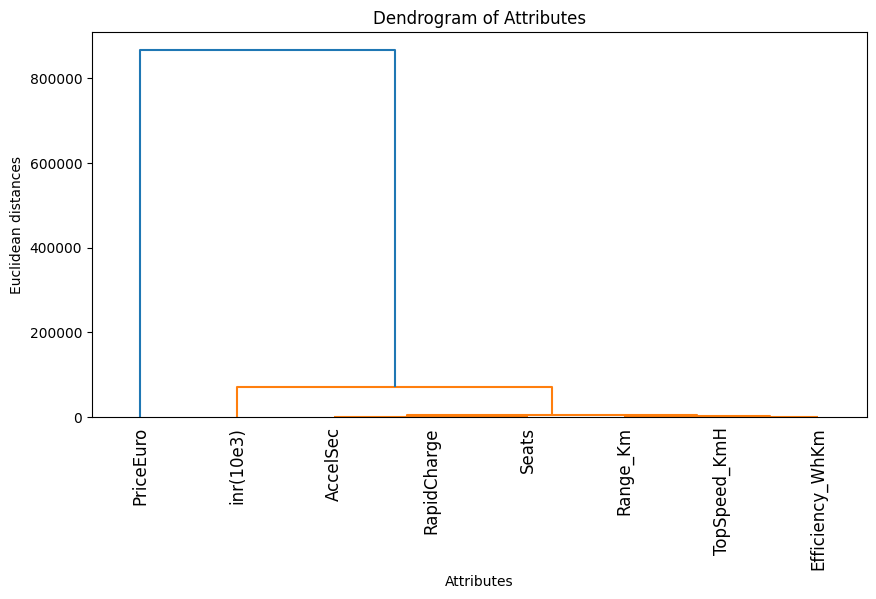

In [62]:
# Performing hierarchical clustering
linked_attributes = linkage(transposed_attributes, method='ward')

# Creating a dendrogram to visualize the clustering
plt.figure(figsize=(10,5))
dendrogram(linked_attributes, labels=transposed_attributes.index, leaf_rotation=90)
plt.title("Dendrogram of Attributes")
plt.xlabel("Attributes")
plt.ylabel("Euclidean distances")
plt.show()

# Extracting the order of attributes from the clustering
order = [transposed_attributes.index[i] for i in dendrogram(linked_attributes, no_plot=True)['leaves']]
order.reverse()  # Reverse the order as per the requirement


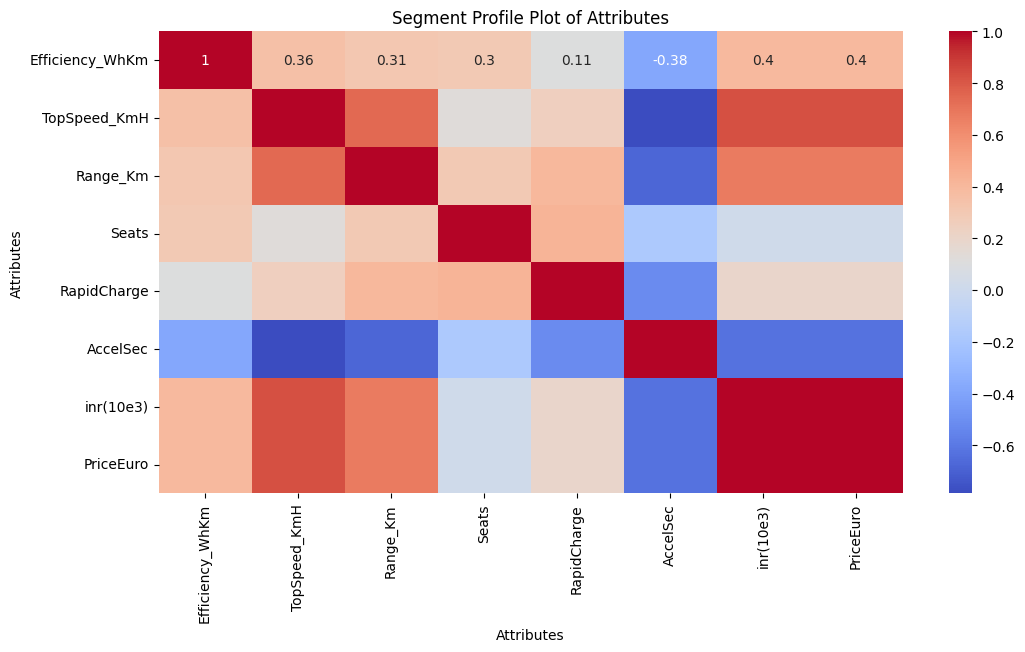

In [63]:
# Rearranging the encoded attributes based on the hierarchical clustering order
rearranged_attributes = encoded_attributes[order]

# Creating a segment profile plot
plt.figure(figsize=(12, 6))
sns.heatmap(rearranged_attributes.corr(), annot=True, cmap='coolwarm')
plt.title("Segment Profile Plot of Attributes")
plt.xlabel("Attributes")
plt.ylabel("Attributes")
plt.show()


In [64]:
# Performing K-means clustering to segment the data into four groups
kmeans = KMeans(n_clusters=4, random_state=1234)
segments = kmeans.fit_predict(encoded_attributes)

# Getting the size of each cluster
cluster_sizes = pd.Series(kmeans.labels_).value_counts().sort_index()


C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [65]:
data

Brand  AccelSec  TopSpeed_KmH  Range_Km  Efficiency_WhKm  \
0         Tesla        4.6           233       450              161   
1    Volkswagen       10.0           160       270              167   
2      Polestar        4.7           210       400              181   
3           BMW        6.8           180       360              206   
4         Honda        9.5           145       170              168   
..           ...       ...           ...       ...              ...   
98       Nissan        7.5           160       330              191   
99         Audi        4.5           210       335              258   
100      Nissan        5.9           200       325              194   
101      Nissan        5.1           200       375              232   
102       Byton        7.5           190       400              238   

    FastCharge_KmH  RapidCharge PowerTrain    PlugType  BodyStyle Segment  \
0              940            1        AWD  Type 2 CCS      Sedan       D   
1              250            1        RWD  Type 2 CCS  Hatchback       C   
2              620            1        AWD  Type 2 CCS   Liftback       D   
3              560            1        RWD  Type 2 CCS        SUV       D   
4              190            1        RWD  Type 2 CCS  Hatchback       B   
..             ...          ...        ...         ...        ...     ...   
98             440            1        FWD  Type 2 CCS  Hatchback       C   
99             540            1        AWD  Type 2 CCS        SUV       E   
100            440            1        AWD  Type 2 CCS  Hatchback       C   
101            450            1        AWD  Type 2 CCS  Hatchback       C   
102            480            1        AWD  Type 2 CCS        SUV       E   

     Seats  PriceEuro  inr(10e3)  
0        5      55480  4615.9360  
1        5      30000  2496.0000  
2        5      56440  4695.8080  
3        5      68040  5660.9280  
4        4      32997  2745.3504  
..     ...        ...        ...  
98       5      45000  3744.0000  
99       5      96050  7991.3600  
100      5      50000  4160.0000  
101      5      65000  5408.0000  
102      5      62000  5158.4000  

[103 rows x 14 columns]

In [66]:
#data=df.drop(columns=['review'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   AccelSec         103 non-null    float64
 2   TopSpeed_KmH     103 non-null    int64  
 3   Range_Km         103 non-null    int64  
 4   Efficiency_WhKm  103 non-null    int64  
 5   FastCharge_KmH   103 non-null    object 
 6   RapidCharge      103 non-null    int64  
 7   PowerTrain       103 non-null    object 
 8   PlugType         103 non-null    object 
 9   BodyStyle        103 non-null    object 
 10  Segment          103 non-null    object 
 11  Seats            103 non-null    int64  
 12  PriceEuro        103 non-null    int64  
 13  inr(10e3)        103 non-null    float64
dtypes: float64(2), int64(6), object(6)
memory usage: 11.4+ KB


In [67]:
clusters = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']
df1 = pd.DataFrame(df, columns=attributes, index=clusters)
df1.index = [f'{cluster}: {size} ({size/sum(cluster_sizes):.0%})' for cluster, size in zip(clusters, cluster_sizes)]
df1.index

Index(['Cluster 1: 58 (56%)', 'Cluster 2: 10 (10%)', 'Cluster 3: 5 (5%)',
       'Cluster 4: 30 (29%)'],
      dtype='object')

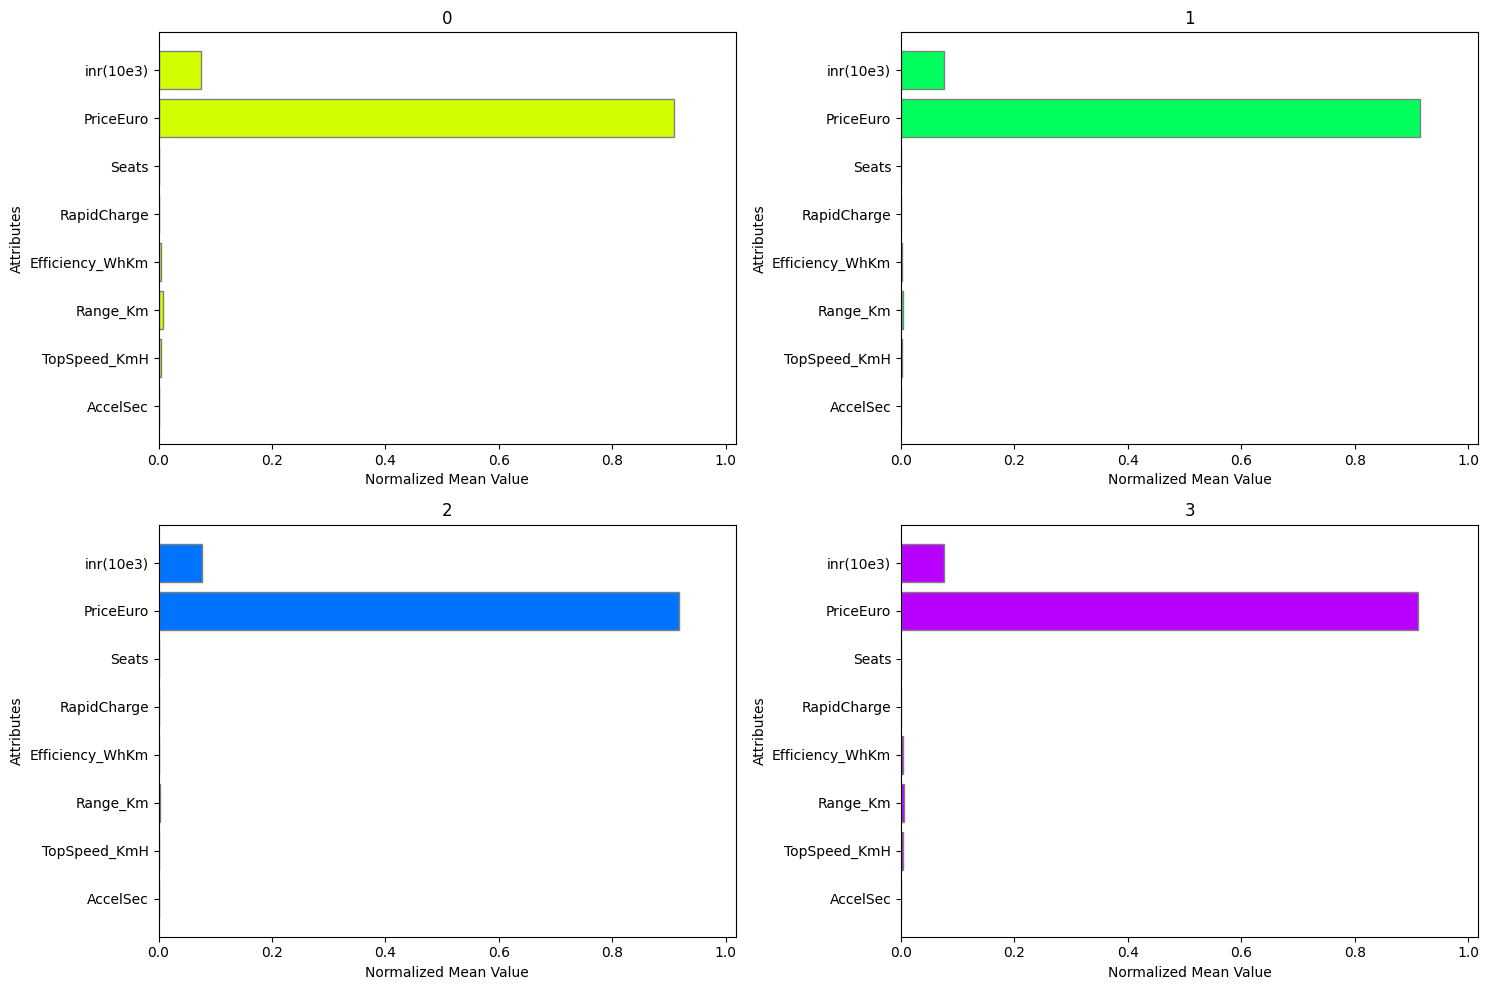

In [68]:
# Adding the segment labels to the encoded data
encoded_data_with_segments = encoded_attributes.copy()
encoded_data_with_segments['Segment'] = segments

# Calculating the mean of each attribute for each segment
segment_means = encoded_data_with_segments.groupby('Segment').mean().iloc[:, :11]  # Selecting only the first 11 columns which are attributes

# Creating a figure for the subplots
plt.figure(figsize=(15, 10))

# Normalizing the segment means for better visualization
normalized_segment_means = (segment_means.T / segment_means.T.sum()).T

# Plotting the bar plots for each segment in separate subplots
for i, segment in enumerate(normalized_segment_means.index):
    # Creating a subplot in a 2x2 layout
    plt.subplot(2, 2, i+1)
    
    # Plotting horizontal bar plot for the current segment
    plt.barh(normalized_segment_means.columns, normalized_segment_means.loc[segment],
             color=sns.color_palette("hsv", 4)[i],  # Using a color palette for differentiation
             edgecolor='grey',
             label=f'{df.index}'
             )
    
    # Setting the title for each subplot to indicate the segment
    #plt.title( df.index[i] : f'{segment}')
    plt.title(f'{df.index[i]}')

    
    # Optionally, adjust the x-axis limits for uniformity across subplots
    plt.xlim(0, normalized_segment_means.values.max() + 0.1)

    # Adding labels to the subplot
    plt.xlabel('Normalized Mean Value')
    plt.ylabel('Attributes')

# Adjust layout for better spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


In [69]:
from statsmodels.graphics.mosaicplot import mosaic


In [70]:
numeric_columns=data.drop(columns=['FastCharge_KmH','Brand','PowerTrain','PlugType','BodyStyle','Segment']).columns[:]
numeric_columns


Index(['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm',
       'RapidCharge', 'Seats', 'PriceEuro', 'inr(10e3)'],
      dtype='object')

In [71]:
data.head()

Brand  AccelSec  TopSpeed_KmH  Range_Km  Efficiency_WhKm  \
0       Tesla        4.6           233       450              161   
1  Volkswagen       10.0           160       270              167   
2    Polestar        4.7           210       400              181   
3         BMW        6.8           180       360              206   
4       Honda        9.5           145       170              168   

  FastCharge_KmH  RapidCharge PowerTrain    PlugType  BodyStyle Segment  \
0            940            1        AWD  Type 2 CCS      Sedan       D   
1            250            1        RWD  Type 2 CCS  Hatchback       C   
2            620            1        AWD  Type 2 CCS   Liftback       D   
3            560            1        RWD  Type 2 CCS        SUV       D   
4            190            1        RWD  Type 2 CCS  Hatchback       B   

   Seats  PriceEuro  inr(10e3)  
0      5      55480  4615.9360  
1      5      30000  2496.0000  
2      5      56440  4695.8080  
3      5      68040  5660.9280  
4      4      32997  2745.3504

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



<Figure size 1200x800 with 0 Axes>

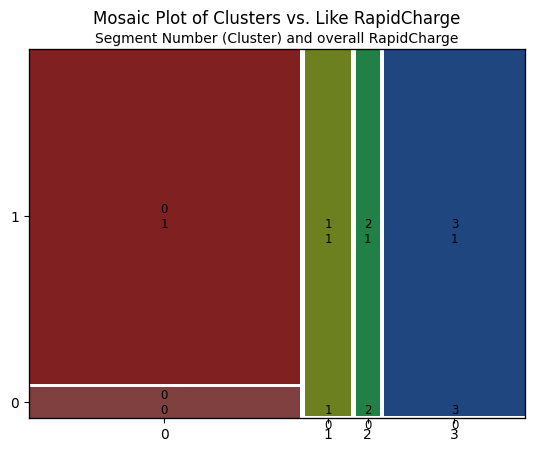

In [72]:
# Clustering: Perform K-means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=1234)
data['cluster'] = kmeans.fit_predict(data[numeric_columns])

# Prepare data for the mosaic plot: Create a contingency table
contingency_table = pd.crosstab(data['cluster'], data['RapidCharge'])

# Mosaic plot
plt.figure(figsize=(12, 8))
mosaic(contingency_table.stack(), gap=0.01, title='Mosaic Plot of Clusters vs. Like RapidCharge')
plt.xlabel('Segment Number (Cluster) and overall RapidCharge')
plt.ylabel('Frequency')
plt.show()

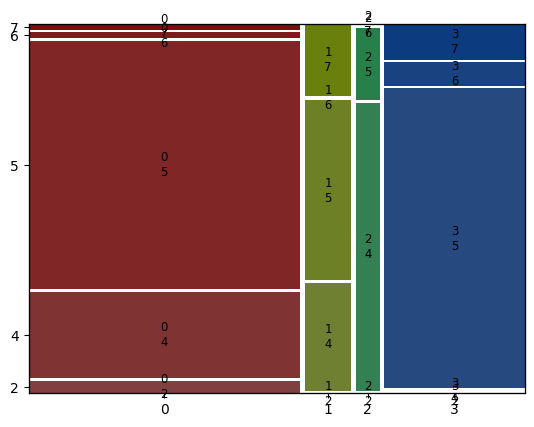

In [73]:
k1 = kmeans.labels_
ct = pd.crosstab(kmeans.labels_, data['Seats'])
ct
mosaic(ct.stack(),gap=0.01)
plt.show()

In [74]:
Ev_dc=data

In [75]:
condition_mapping = {'No': 0, 'Yes': 1}
Ev_dc['RapidCharge'] = Ev_dc['RapidCharge'].map(condition_mapping)
#Ev_dc['driven'] = Ev_dc['driven'].map(driven_mapping)

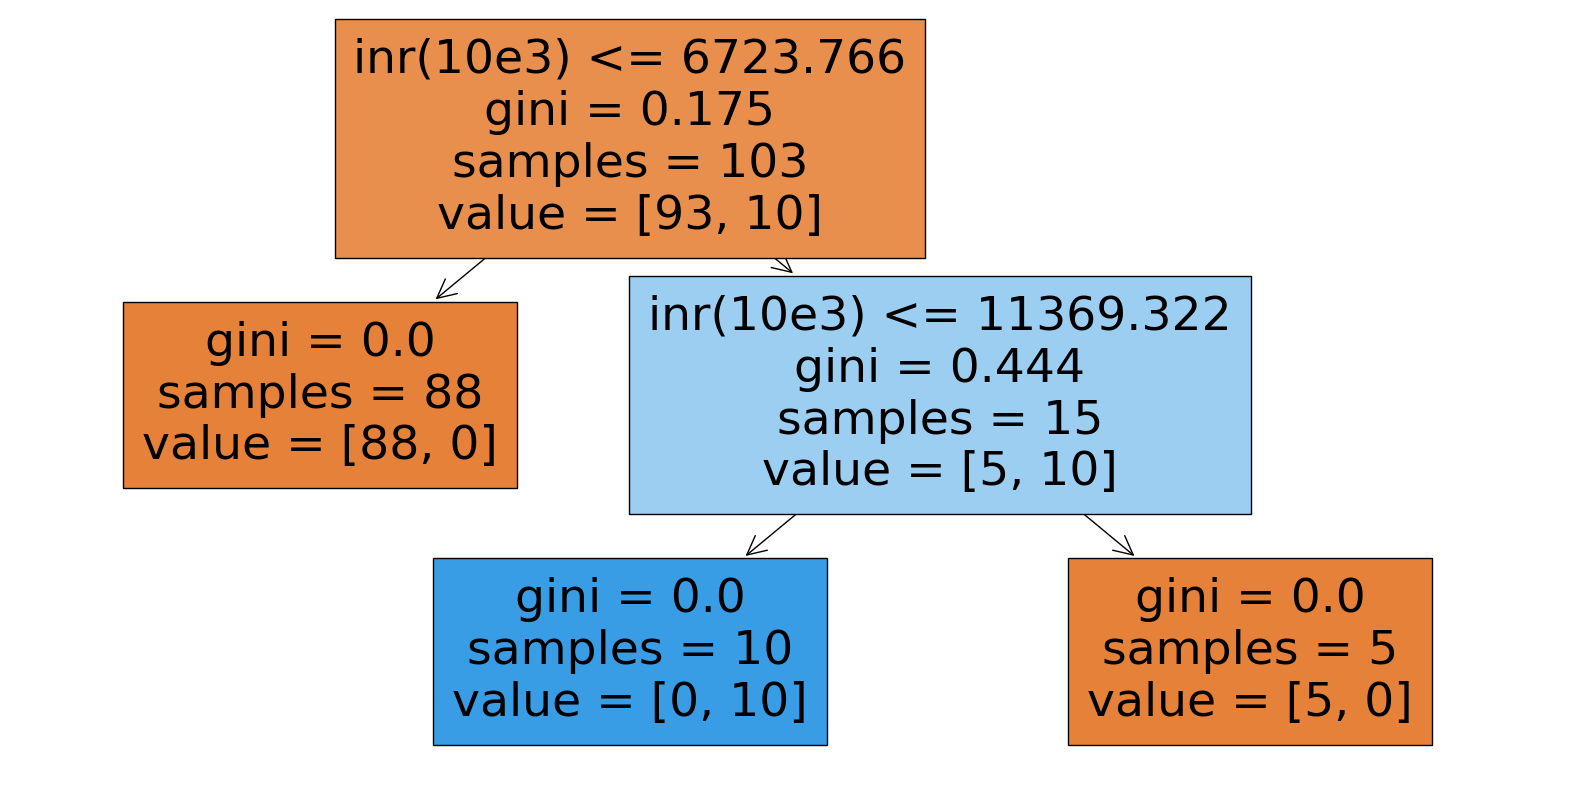

In [76]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

X = Ev_dc[['TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm',
          'PriceEuro', 'inr(10e3)']]
y = (Ev_dc['cluster'] == 1).astype(int) 

tree = DecisionTreeClassifier(max_depth=10)

tree.fit(X, y)

# Plotting the tree
plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, feature_names=X.columns.tolist())
plt.show()

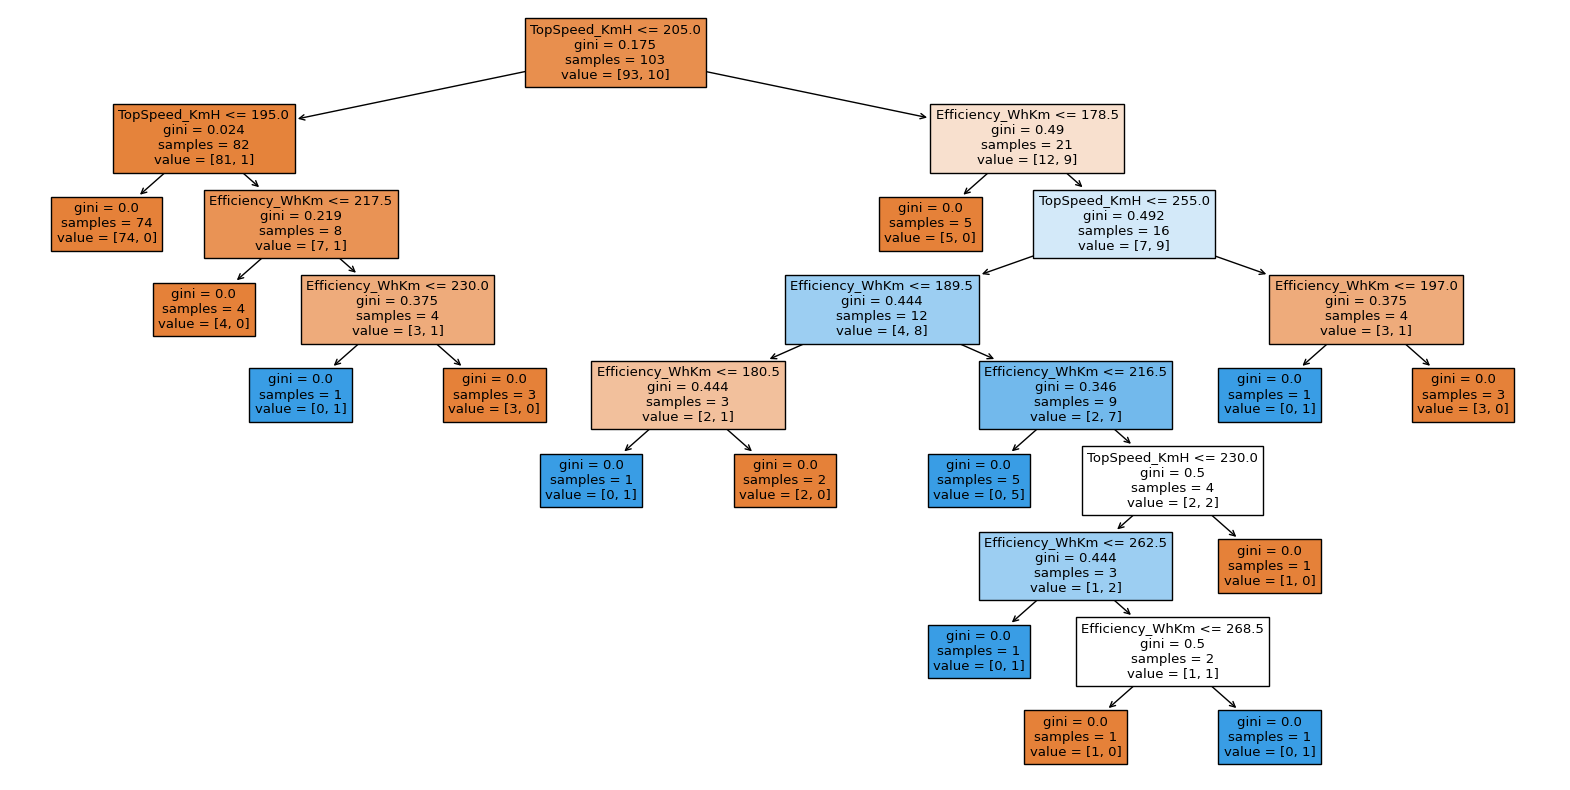

In [77]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

X = Ev_dc[['TopSpeed_KmH','Efficiency_WhKm']]
y = (Ev_dc['cluster'] == 1).astype(int) 

tree = DecisionTreeClassifier(max_depth=10)

tree.fit(X, y)

# Plotting the tree
plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, feature_names=X.columns.tolist())
plt.show()

In [78]:
#df = pd.DataFrame({'Segment': k1, 'driven': data['driven'], 'rating': data['rating'], 'Condition': data['Condition']})

# Calculate the mean of each segment for each segment
driven_means = df.groupby('Segment')['RapidCharge'].mean()

pd.DataFrame(driven_means)

RapidCharge
Segment             
A           0.428571
B           1.000000
C           1.000000
D           1.000000
E           1.000000
F           1.000000
N           0.833333
S           1.000000

In [79]:
rating_means = df.groupby('Segment')['Seats'].mean()
pd.DataFrame(rating_means)

Seats
Segment          
A        3.428571
B        4.681818
C        4.933333
D        5.266667
E        5.000000
F        4.833333
N        6.166667
S        4.000000

In [80]:
Condition_means = df.groupby('Segment')['Range_Km'].mean()
pd.DataFrame(Condition_means)

Range_Km
Segment            
A        143.571429
B        265.681818
C        329.333333
D        400.000000
E        345.500000
F        455.000000
N        380.000000
S        970.000000

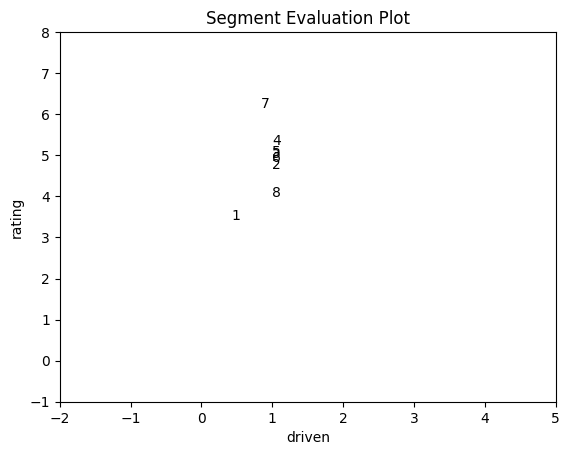

In [81]:
# Create the scatter plot
plt.scatter(Condition_means , rating_means,s=[500 * f for f in driven_means])  # Multiply by 100 or another factor for better visibility

# Set the limits of the plot
plt.xlim(-2, 5)
plt.ylim(-1, 8)

# Add text labels
for i, (x, y) in enumerate(zip(driven_means, rating_means)):
    plt.text(x, y, str(i+1))

# Adding title and labels
plt.title("Segment Evaluation Plot")
plt.xlabel("driven")
plt.ylabel("rating")
# Show the plot
plt.show()